## Importing required packages

In [5]:
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn
# !pip install matplotlib
# !pip install collections
# !pip install gdown

from collections import Counter
from numpy import mean, std
import numpy as np
from pandas import read_csv
import pandas as pd
import seaborn as sns
import gdown

import copy
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import fbeta_score, f1_score,precision_score,recall_score,accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from credit_data_actual_values import substitute

## Downloading the data

In [31]:
# Download from Google Drive
#url = 'https://drive.google.com/uc?id=' + '1WC-3iPQJrud1WTer883rYdHMHGqgIVJ9' #(URI ID)
#output = '/home/user/data/german.data' # Destination directory
#gdown.download(url, output, quiet=False) 

Downloading...
From: https://drive.google.com/uc?id=1WC-3iPQJrud1WTer883rYdHMHGqgIVJ9
To: C:\Users\LENOVO\Downloads
100%|█████████████████████████████████████████████████████████████████████████████| 79.8k/79.8k [00:00<00:00, 25.6MB/s]


'C:/Users/LENOVO/Downloads'

In [6]:
#Load the data using pandas read_csv method
#df=read_csv(output, sep=" ", header=None)
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\german.data",sep=" ",header=None)
#Display the first few rows in the dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [7]:
#Download directly from website
#df=read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",\
#               sep=" ",header=None)
#Display first few rows in the data frame
#df.head()


## Data Visualization

In [8]:
# Displaying data in human readable form with method substitute
# Make replica of the data for converting all the attribute values into human readable form
df_vis = copy.deepcopy(df)
# Call the method substitute from credit_data_actual_values.py to display the real world values
df_vis = substitute(df_vis)

In [9]:
# Task1
# Display the first few rows of the data
#df_vis.set_index("Status of existing checking account",inplace=False).head(2)
df_vis.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,...,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk


In [44]:
df_vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

In [61]:
df_vis.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [21]:
#Prepare data 
# split the data frame into inputs and outputs
te = len(df.columns)-1
X, y = df.drop(te, axis=1), df[te]
X.head()
#y.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# Categorical features has to be converted into integer values for the model to process. 
#This is done through one hot encoding.
# select categorical features
cat_ix = X.select_dtypes(include=['object', 'bool']).columns
# one hot encode categorical features only
ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix)], remainder='passthrough')
X = ct.fit_transform(X)
# label encode the target variable to have the classes 0 and 1
y = LabelEncoder().fit_transform(y)
print(X.shape, y.shape, Counter(y))

cat_ix

(1000, 61) (1000,) Counter({0: 700, 1: 300})


Int64Index([0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19], dtype='int64')

In [26]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [30]:
df_vis.corr()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
Duration in month,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
Credit amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
Installment rate in percentage of disposable income,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
Present residence since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
Age in years,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
Number of existing credits at this bank,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
Number of people being liable to provide maintenance for,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


In [31]:
!pip install h2o

In [32]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.291-b10, mixed mode)
  Starting server from C:\Users\LENOVO\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\LENOVO\AppData\Local\Temp\tmp04ygtfdd
  JVM stdout: C:\Users\LENOVO\AppData\Local\Temp\tmp04ygtfdd\h2o_LENOVO_started_from_python.out
  JVM stderr: C:\Users\LENOVO\AppData\Local\Temp\tmp04ygtfdd\h2o_LENOVO_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,09 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_LENOVO_o38oss
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.749 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"accepting new members, healthy"


In [37]:
#Importing German_credit dataset
f = "german.data"
df = h2o.import_file(f)
df.head(5)

Parse progress: |█████████████████████████████████████████████████████████| 100%


C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21
A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


AutoML progress: |
17:55:52.563: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_AutoML_20210717_175552,0.161739,0.402168,0.161739,0.31932,0.164005,175,0.087809,StackedEnsemble
StackedEnsemble_BestOfFamily_AutoML_20210717_175552,0.163166,0.403938,0.163166,0.325395,0.164631,128,0.012755,StackedEnsemble
XRT_1_AutoML_20210717_175552,0.164508,0.405596,0.164508,0.323894,0.164272,212,0.005834,DRF
GBM_grid__1_AutoML_20210717_175552_model_1,0.165208,0.406457,0.165208,0.331835,0.165973,49,0.0033,GBM
GBM_grid__1_AutoML_20210717_175552_model_7,0.165499,0.406815,0.165499,0.330797,0.166262,76,0.004393,GBM
GBM_2_AutoML_20210717_175552,0.165593,0.406931,0.165593,0.316833,0.166108,114,0.00441,GBM
GBM_grid__1_AutoML_20210717_175552_model_5,0.16575,0.407124,0.16575,0.329951,0.166282,88,0.003863,GBM
GLM_1_AutoML_20210717_175552,0.165974,0.4074,0.165974,0.342056,0.166309,97,0.000897,GLM
GBM_5_AutoML_20210717_175552,0.166999,0.408655,0.166999,0.341747,0.166507,76,0.003128,GBM
GBM_grid__1_AutoML_20210717_175552_model_6,0.167393,0.409137,0.167393,0.323538,0.167299,115,0.004515,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

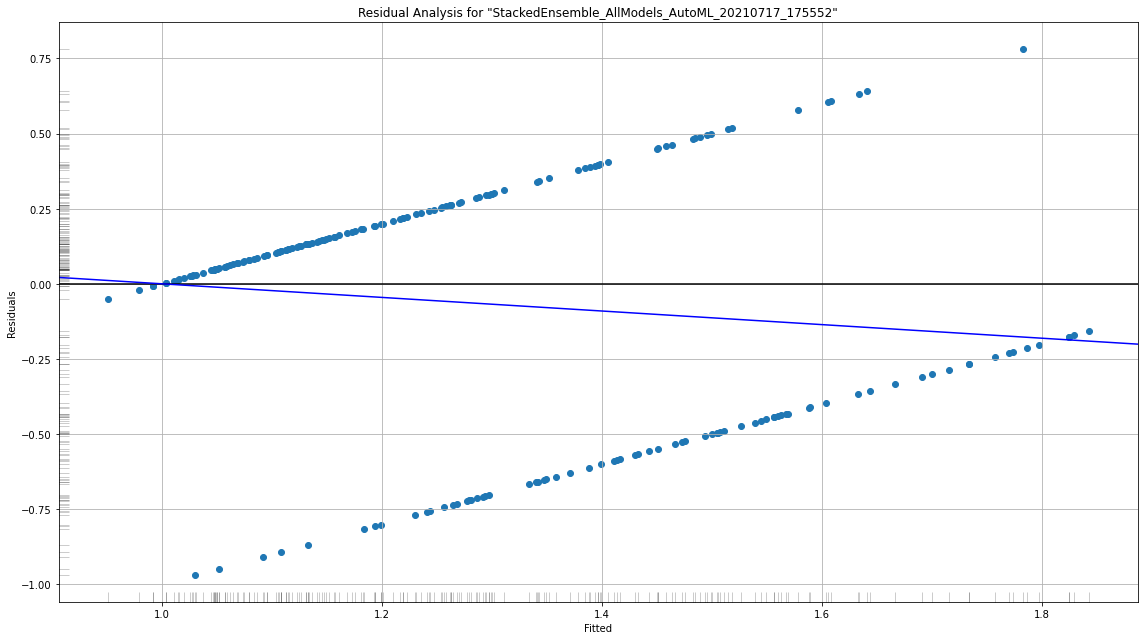

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

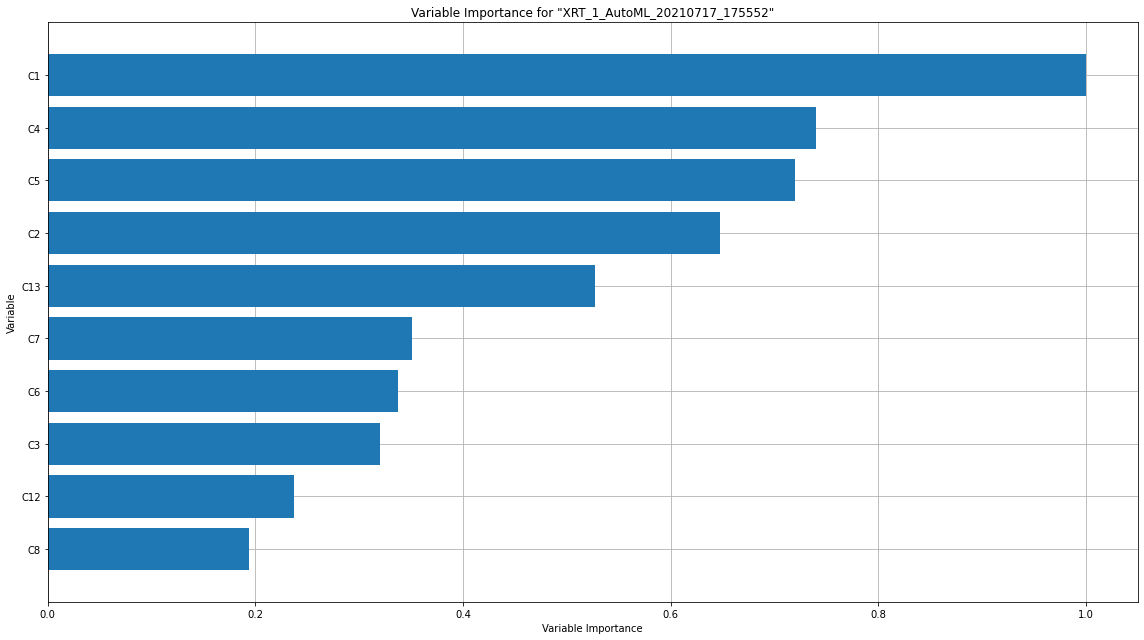

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

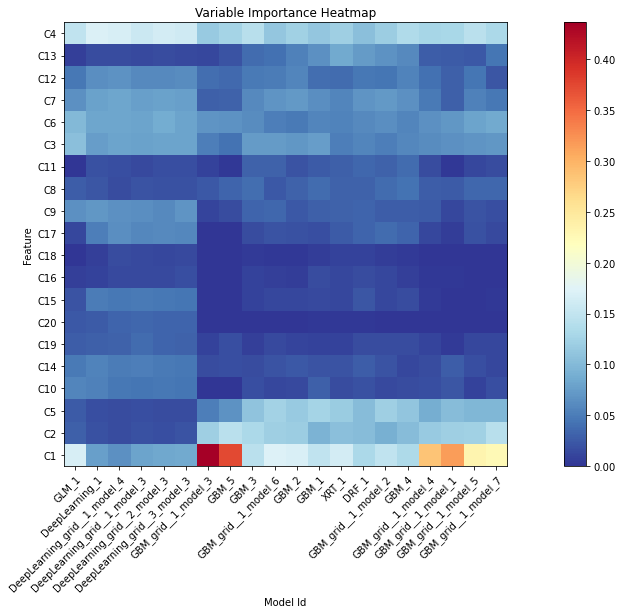

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

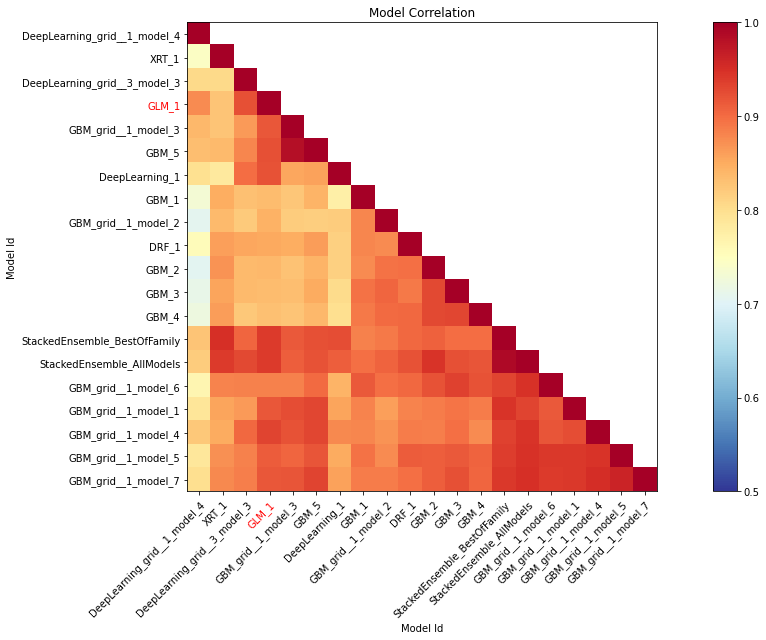

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

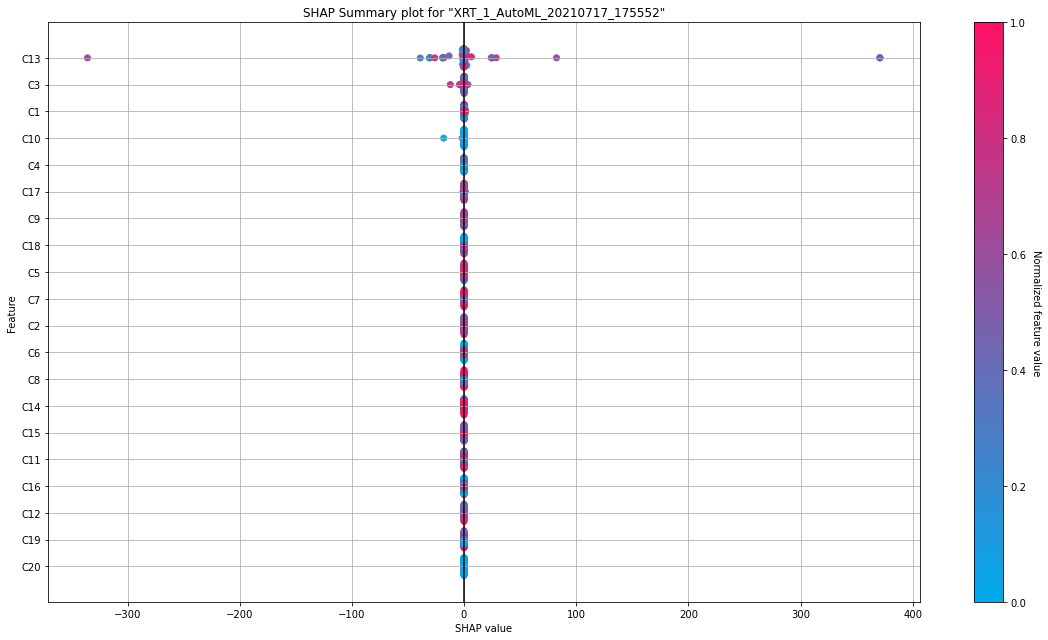

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

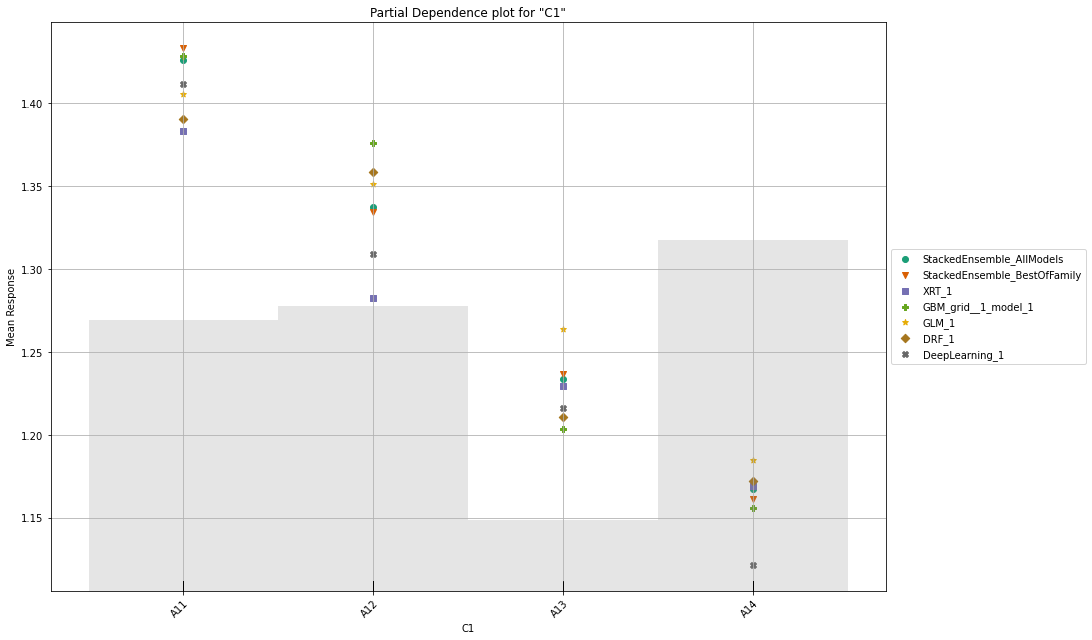

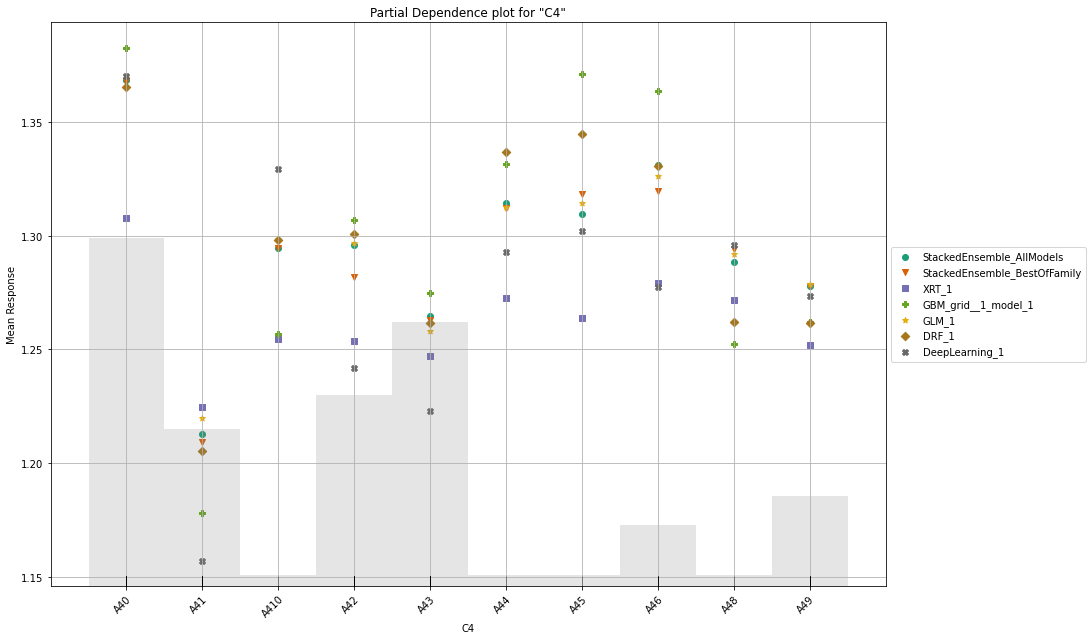

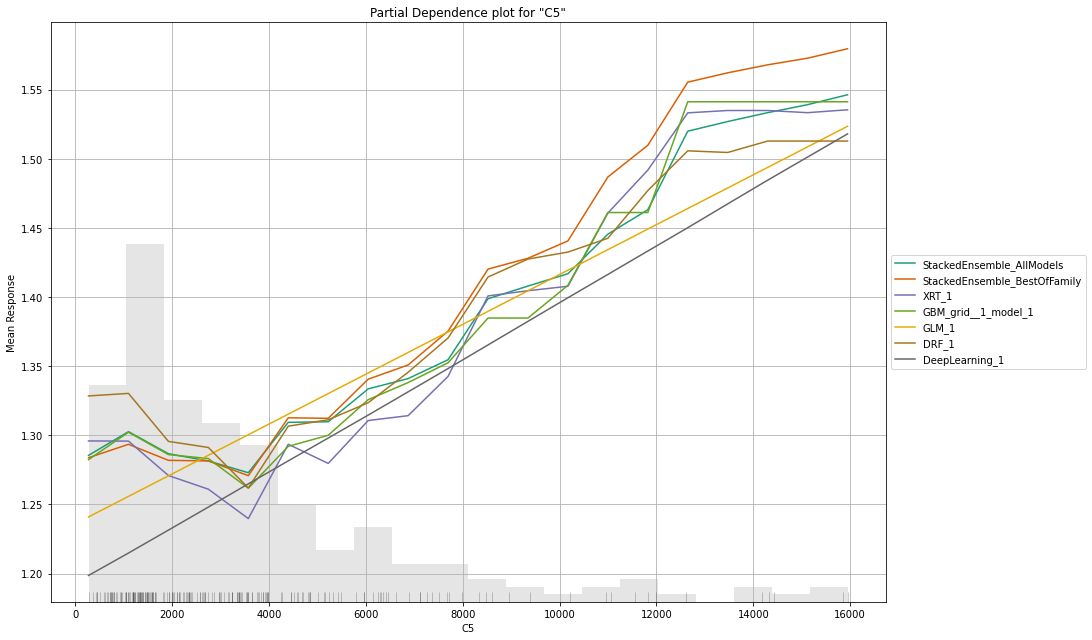

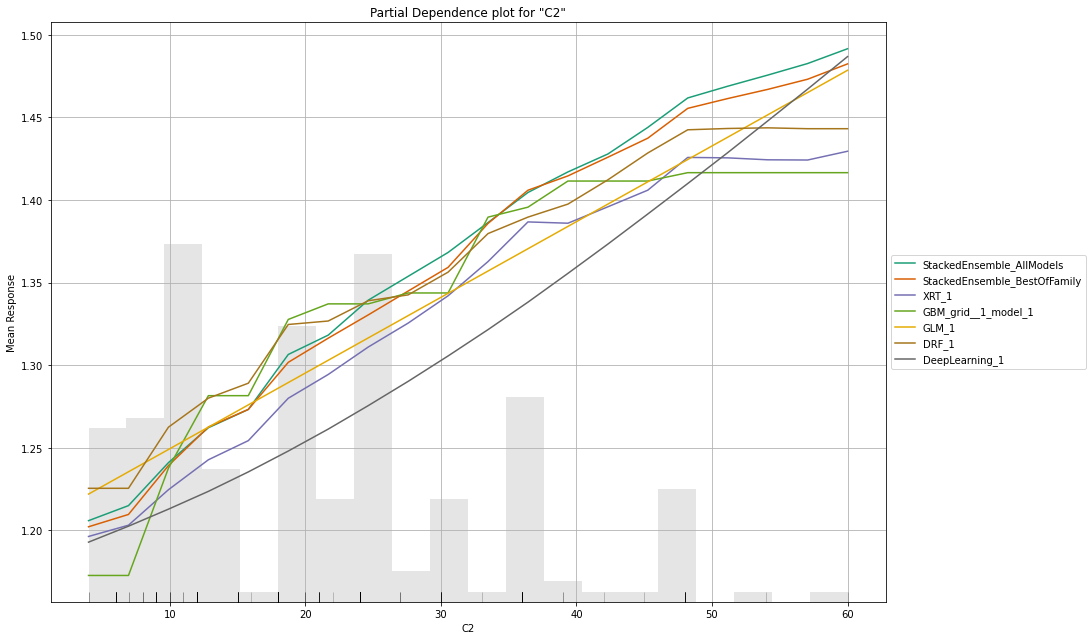

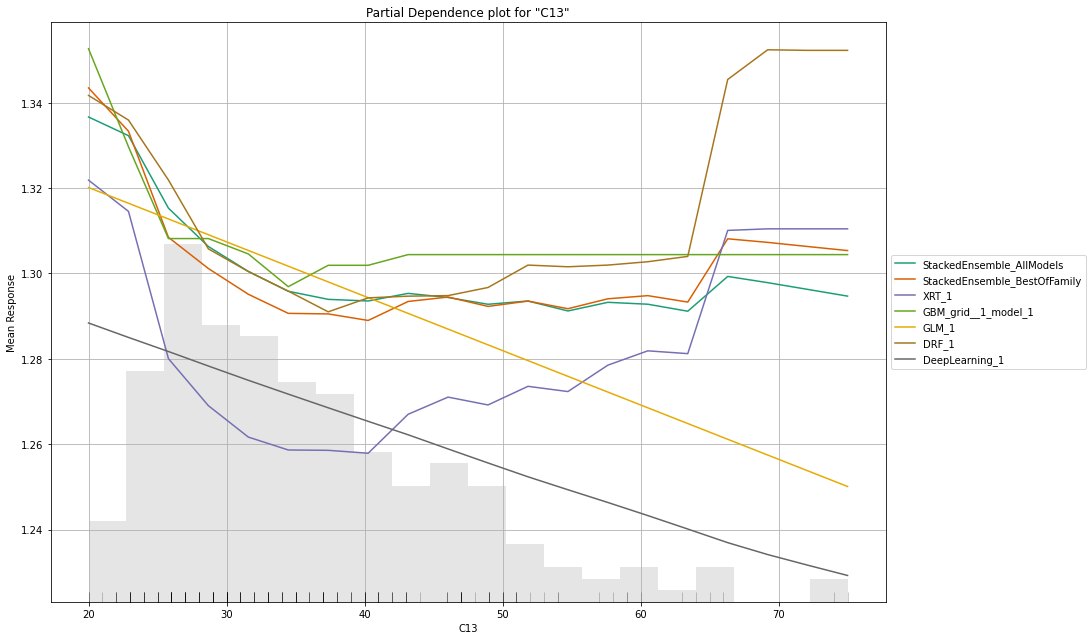

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

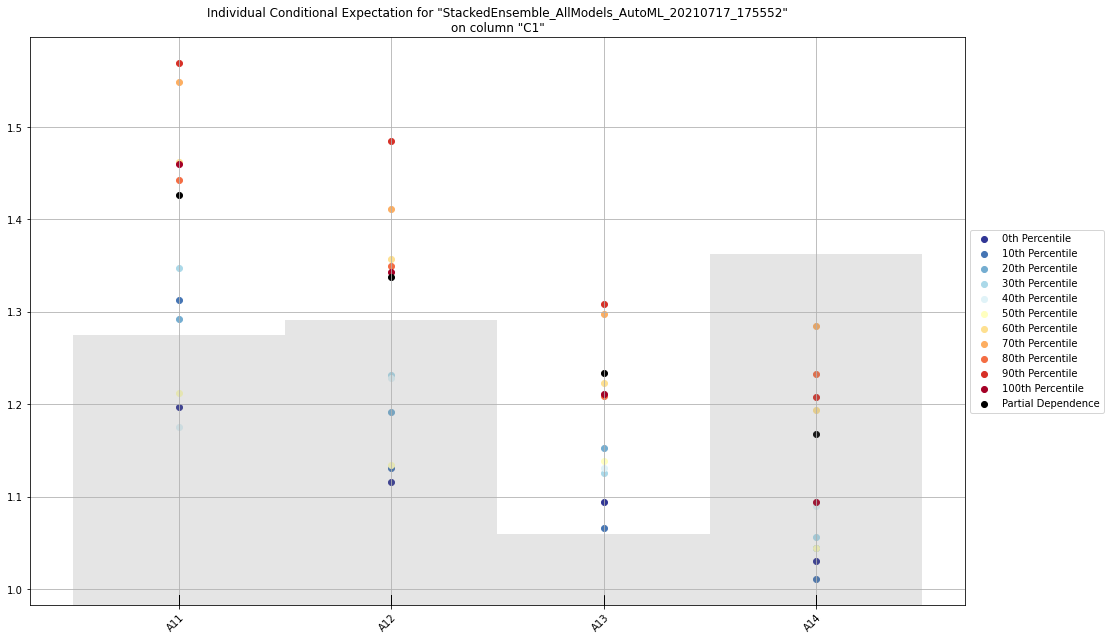

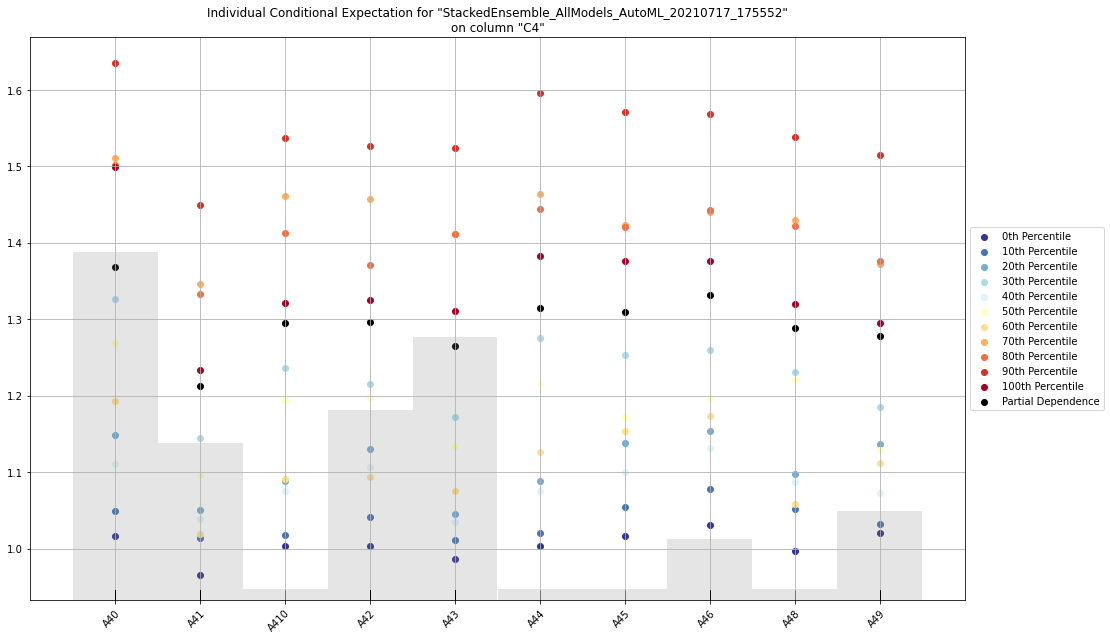

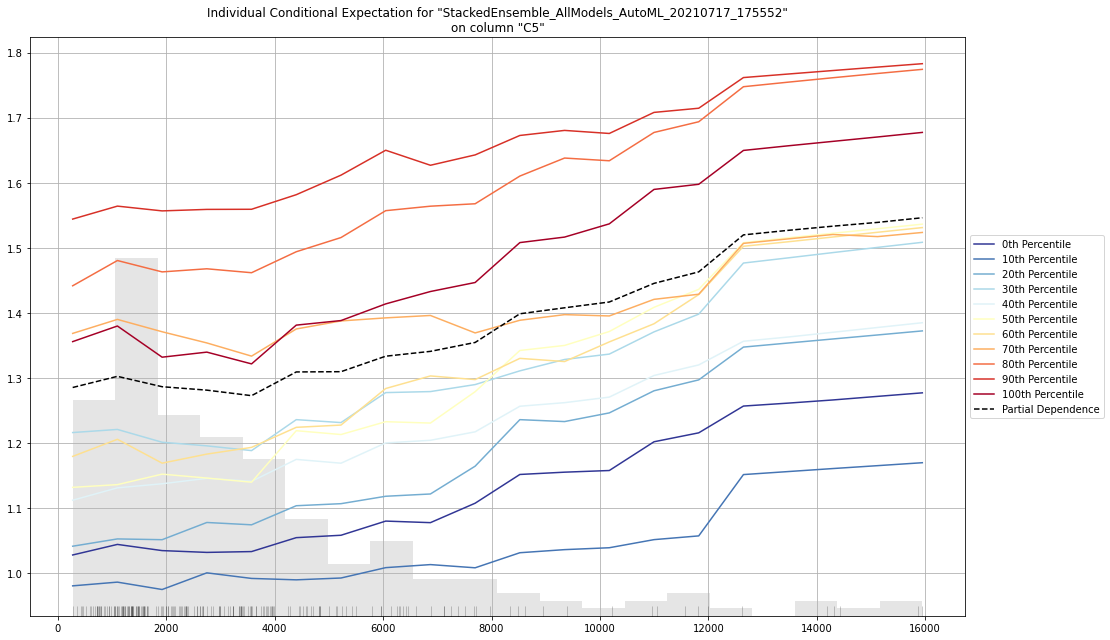

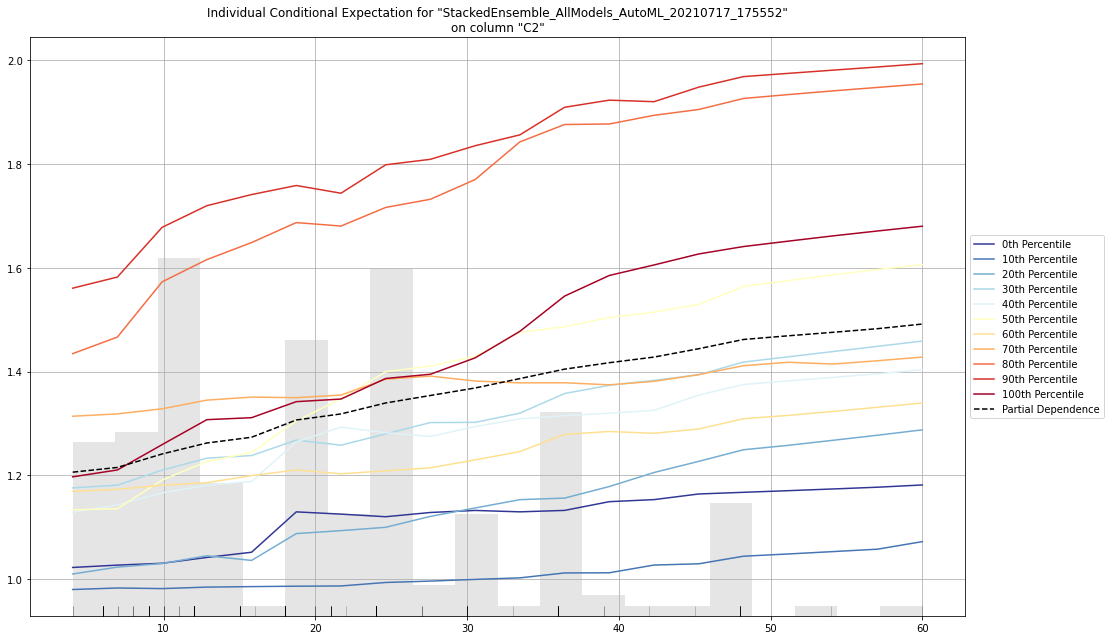

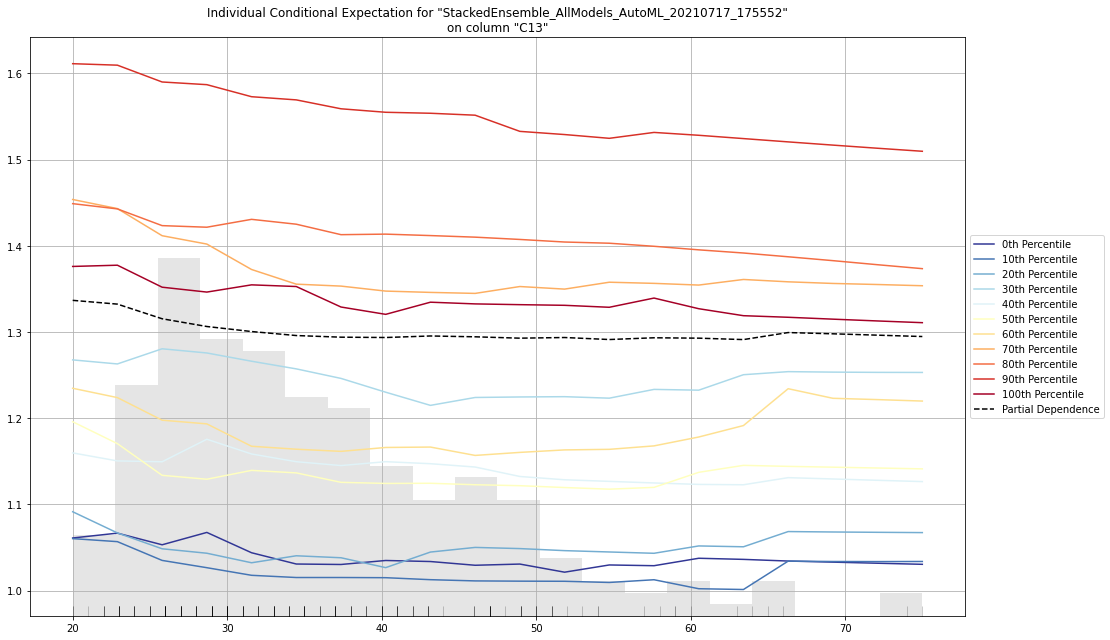

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

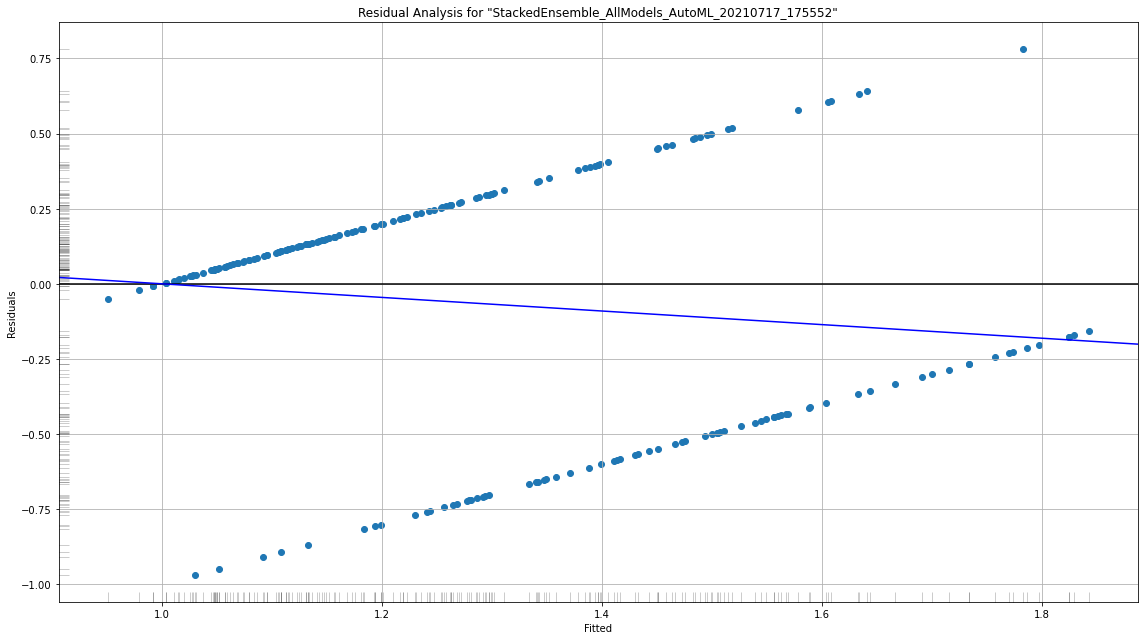

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

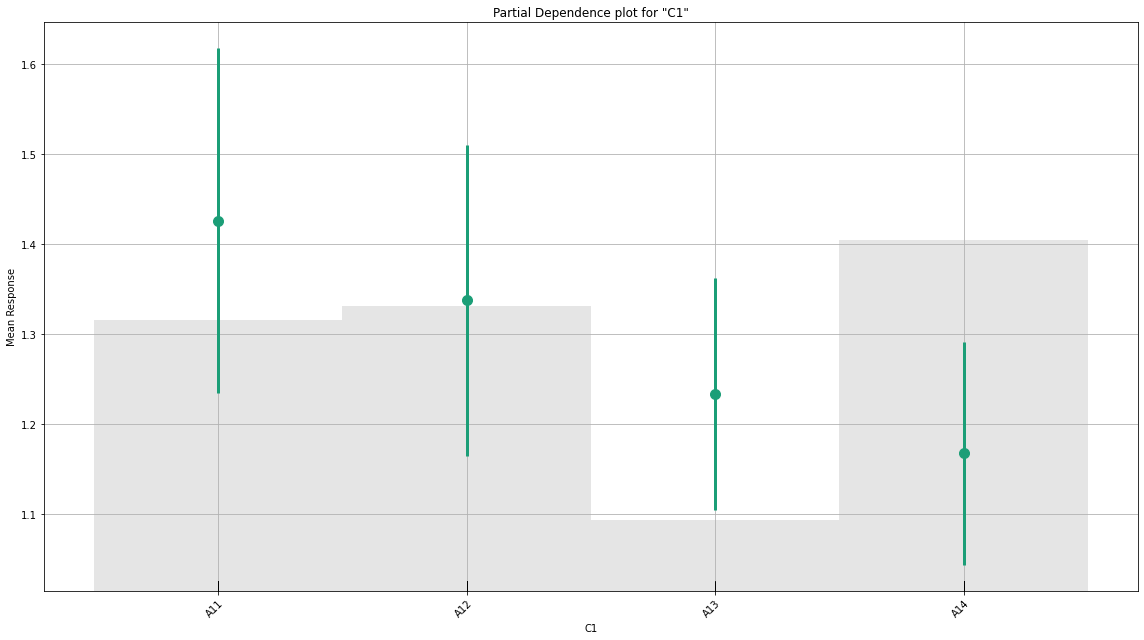

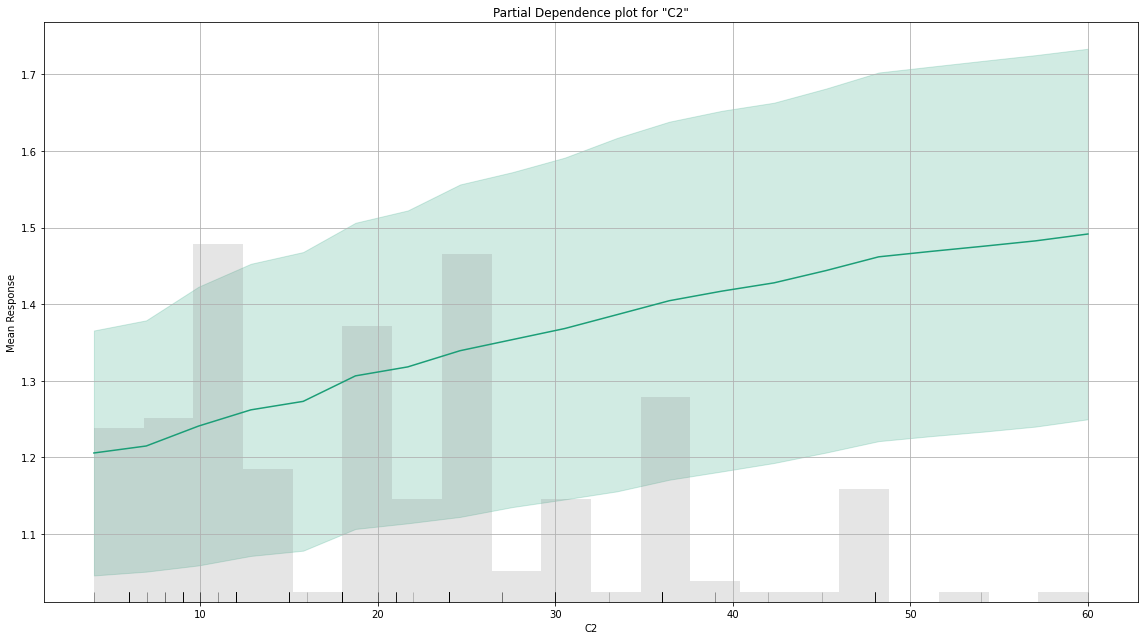

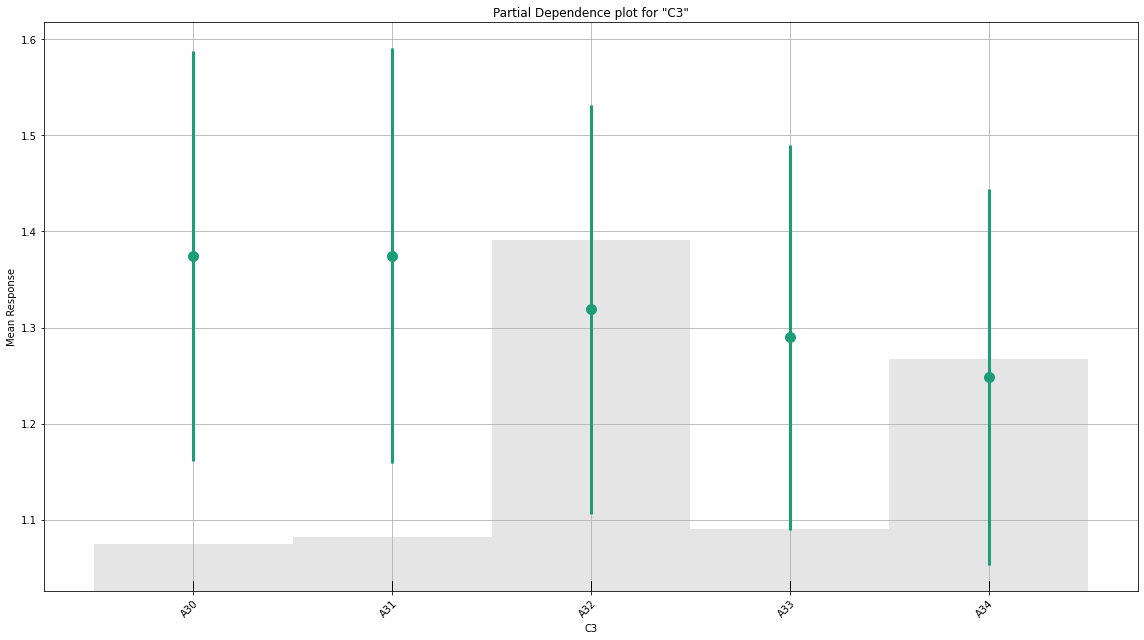

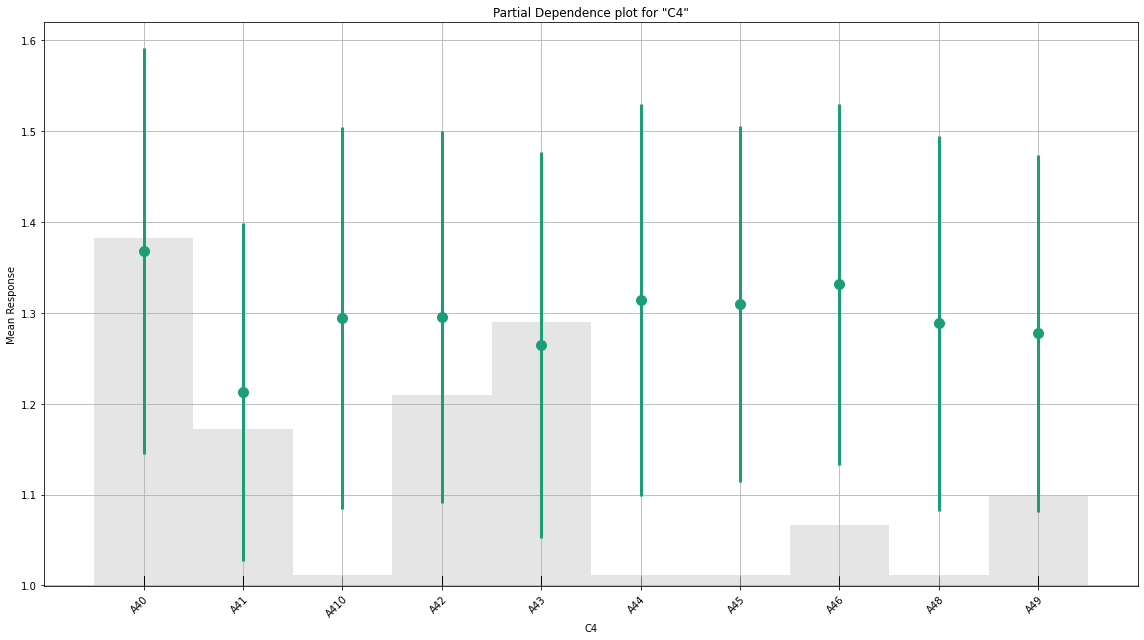

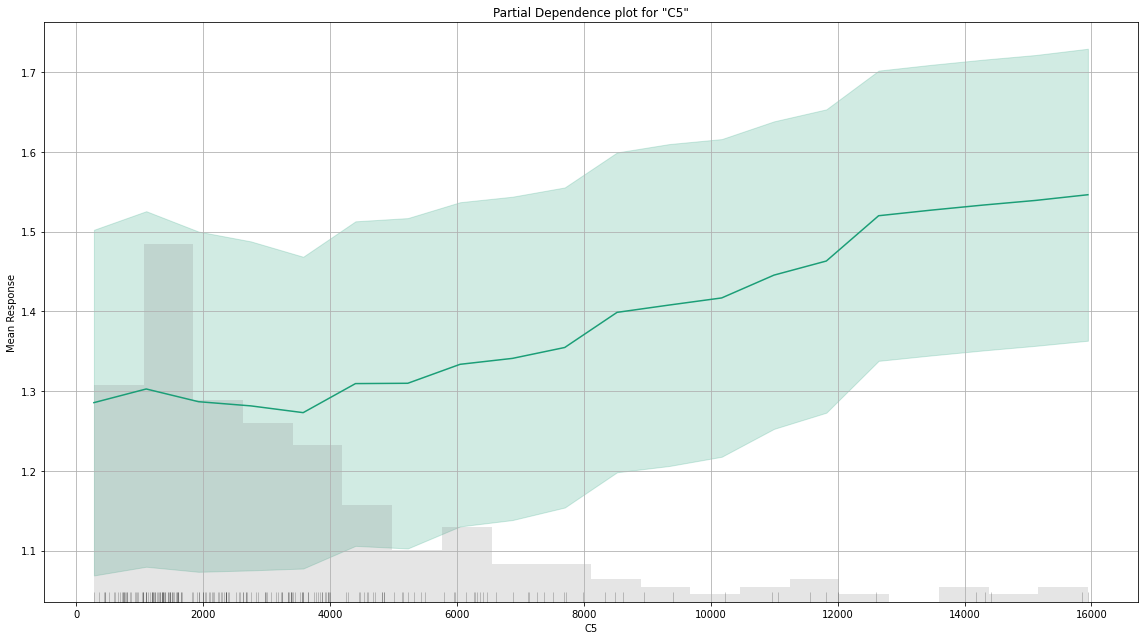

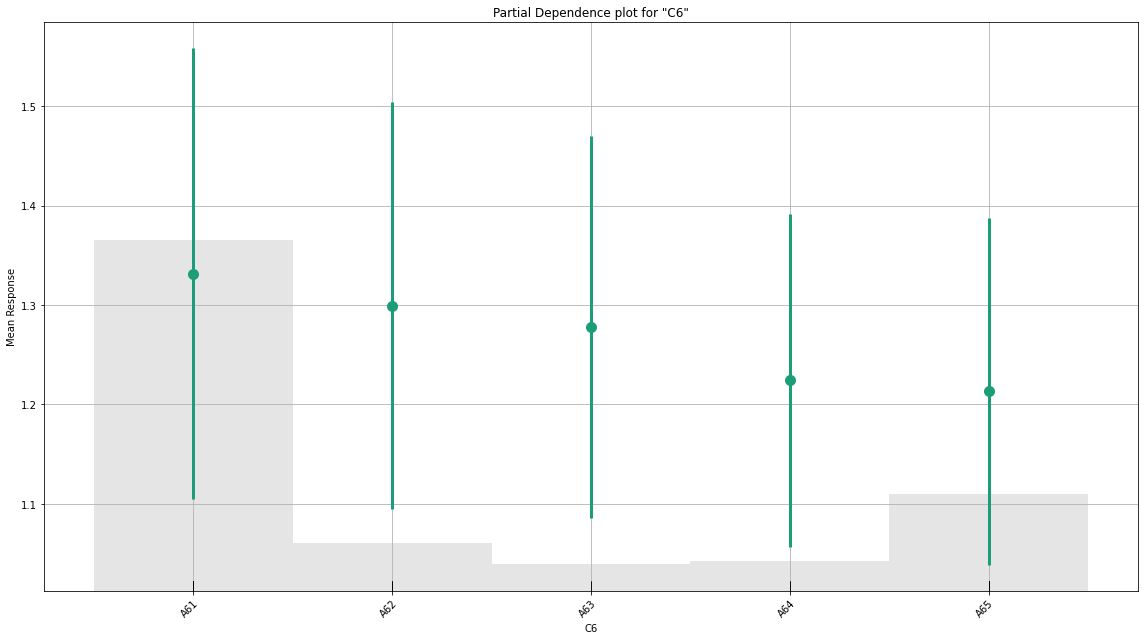

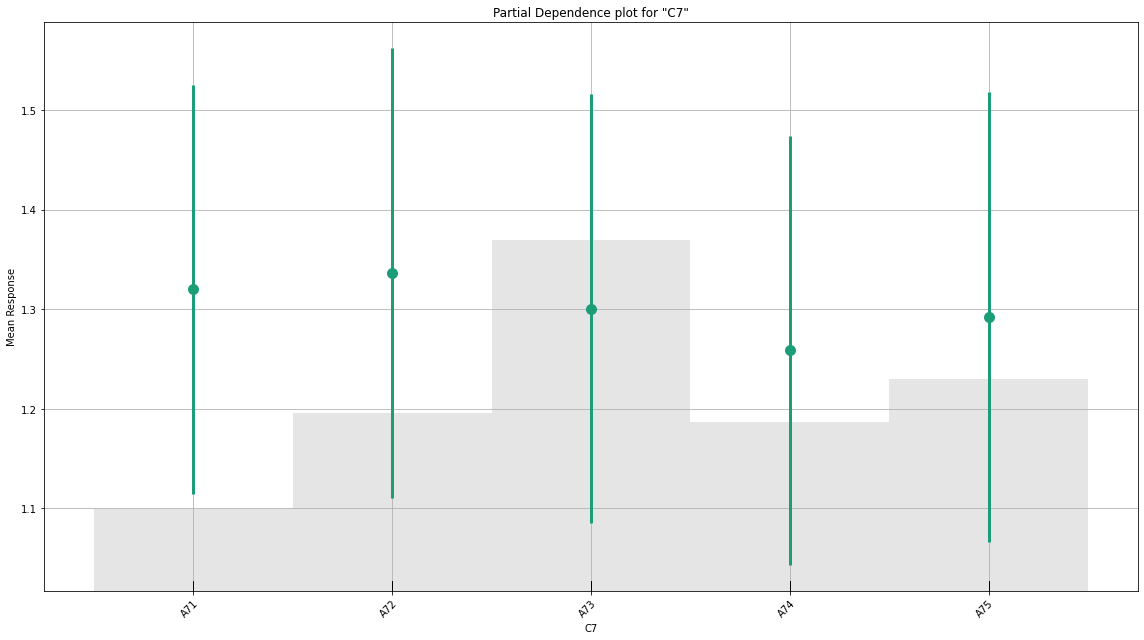

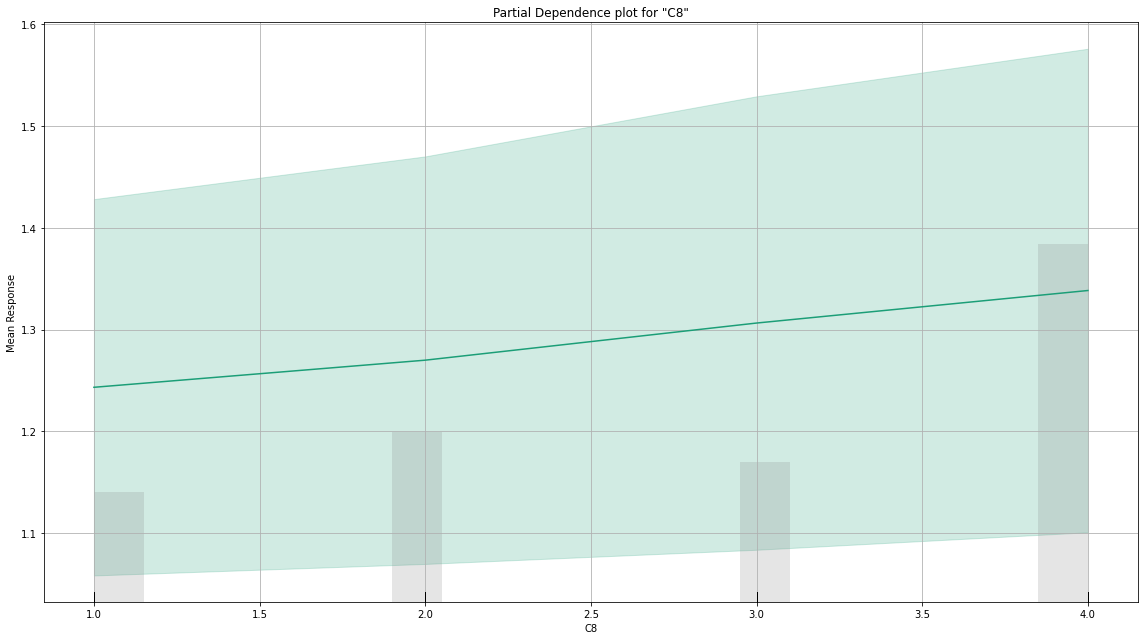

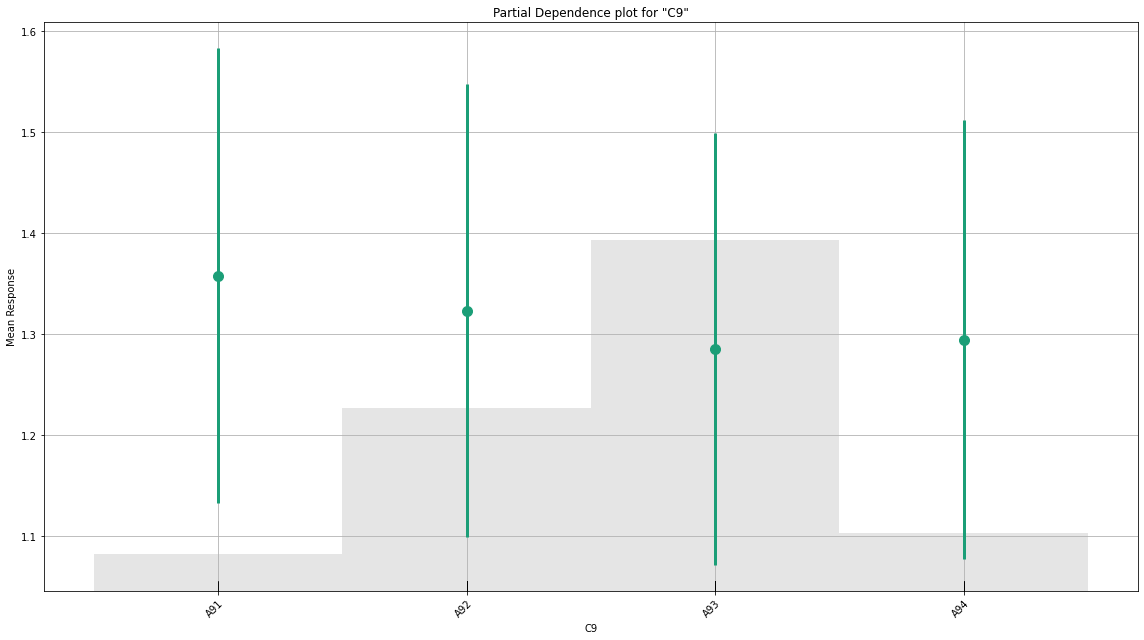

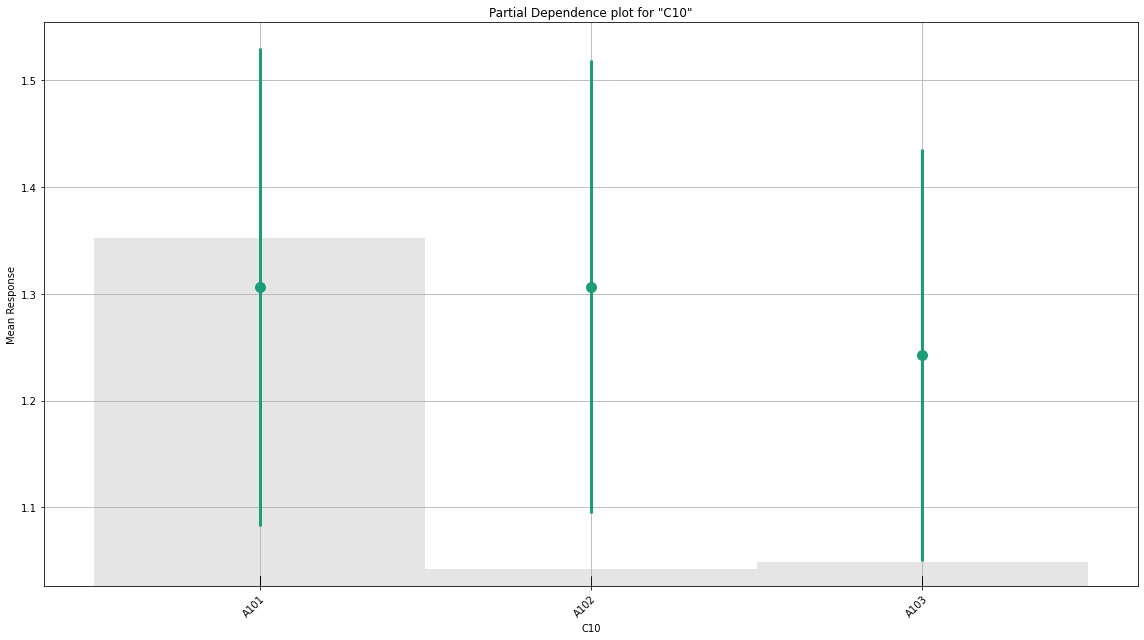

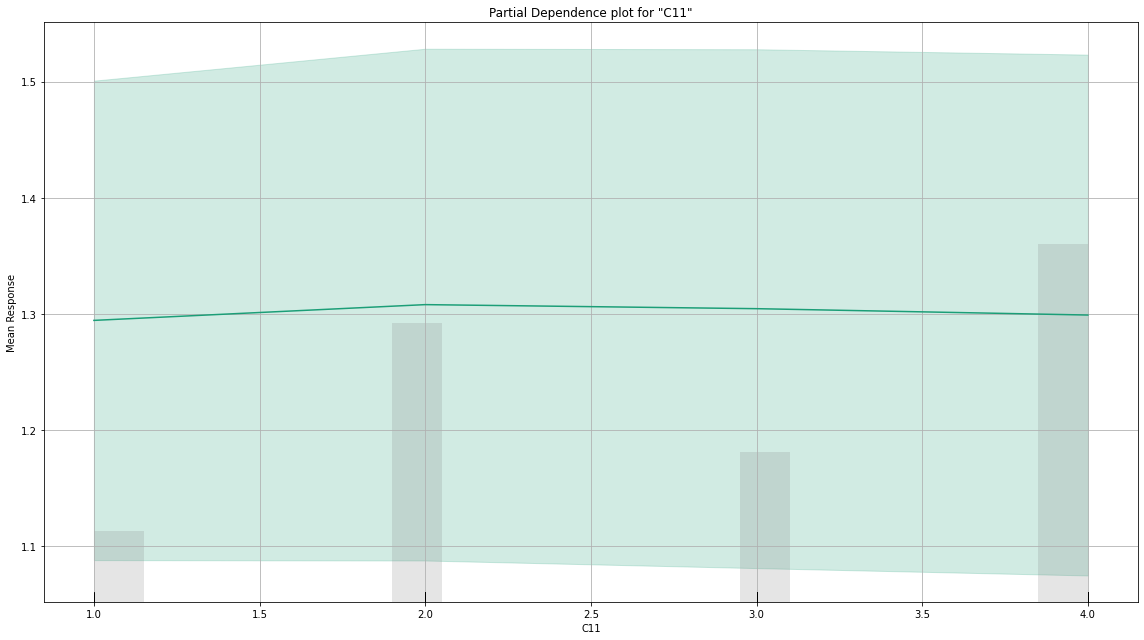

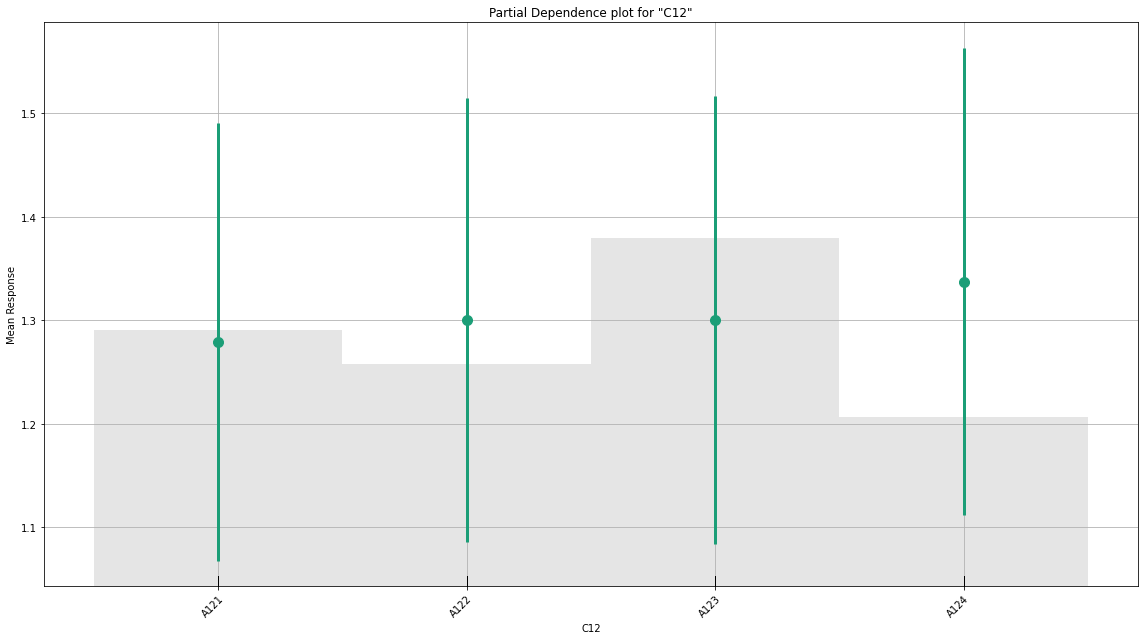

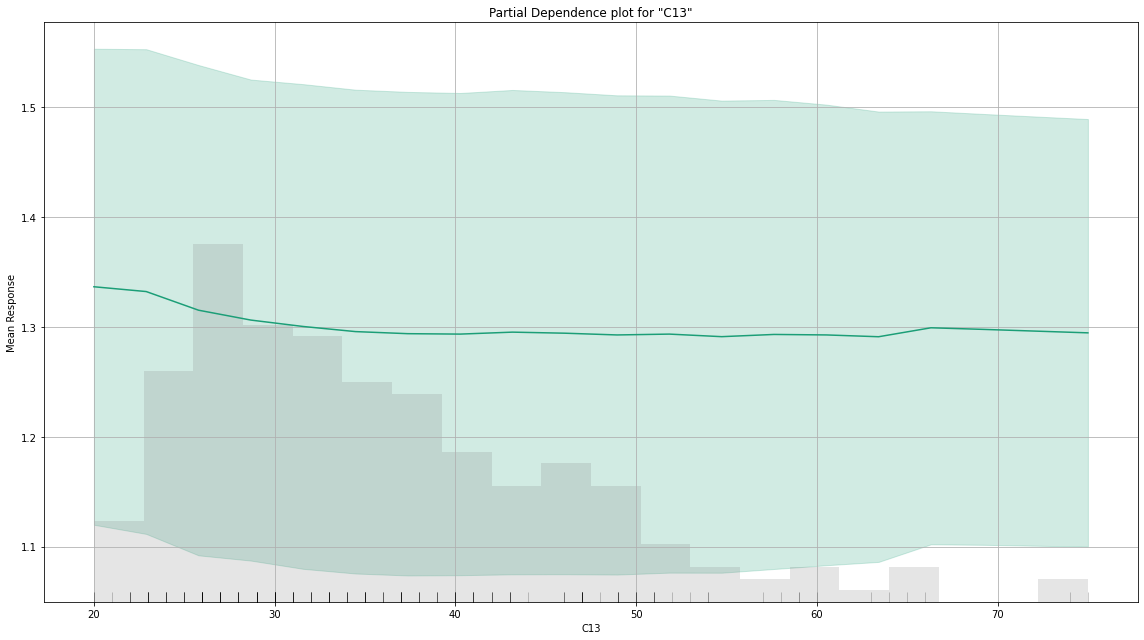

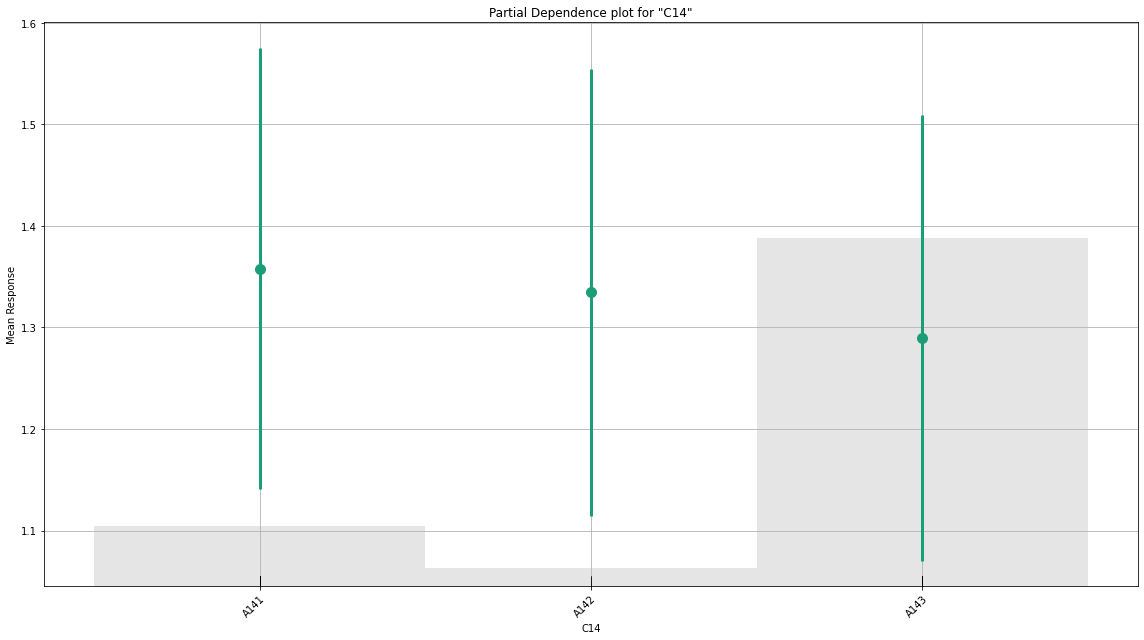

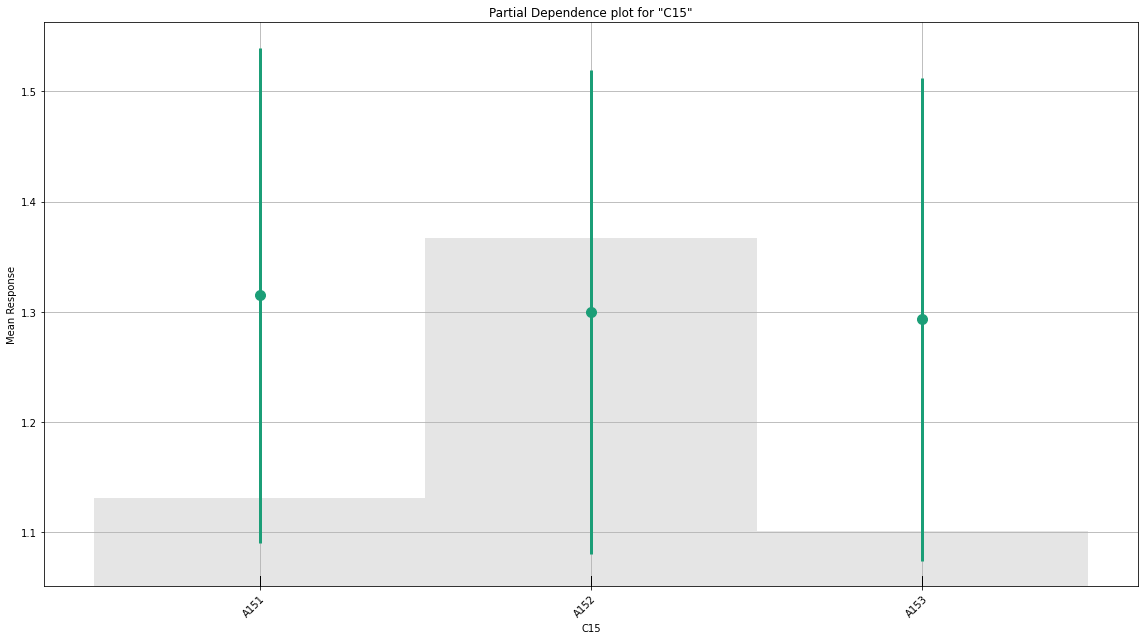

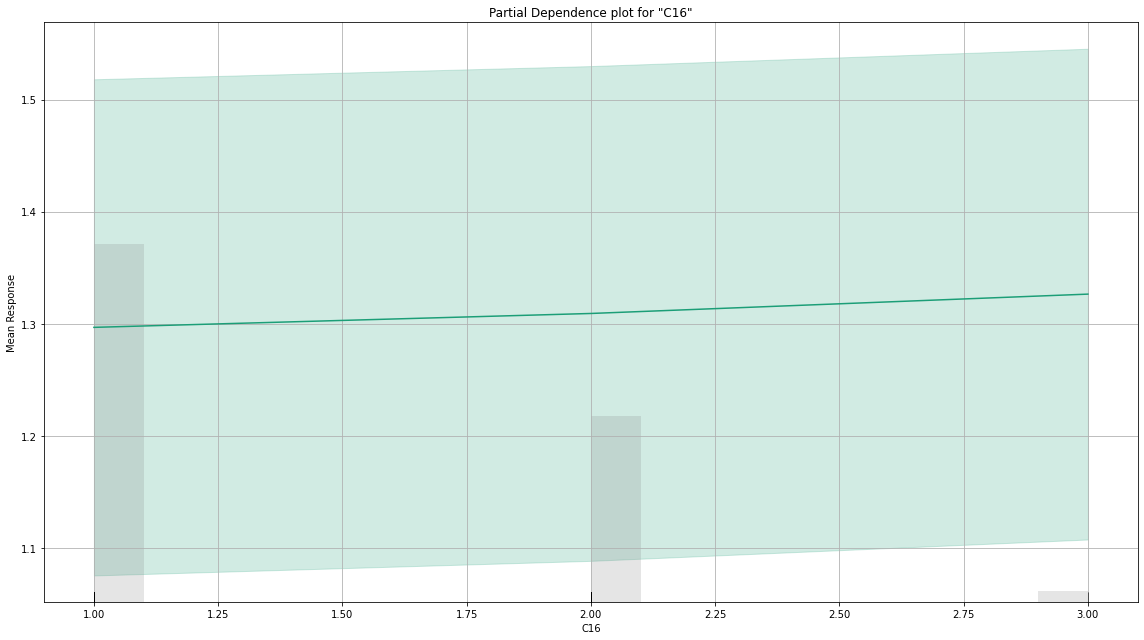

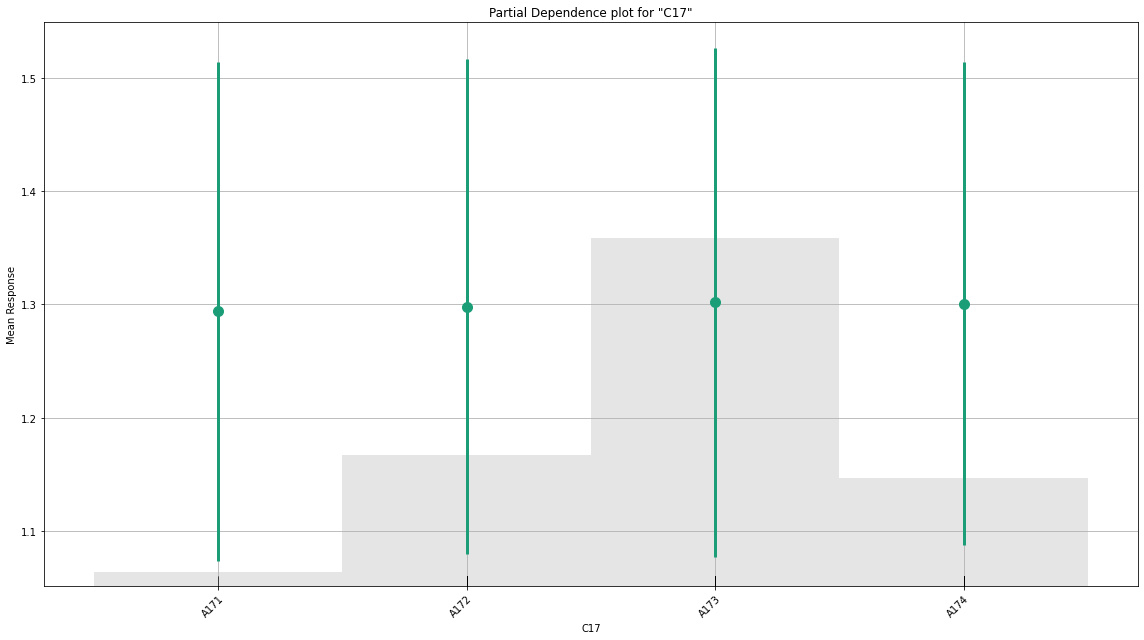

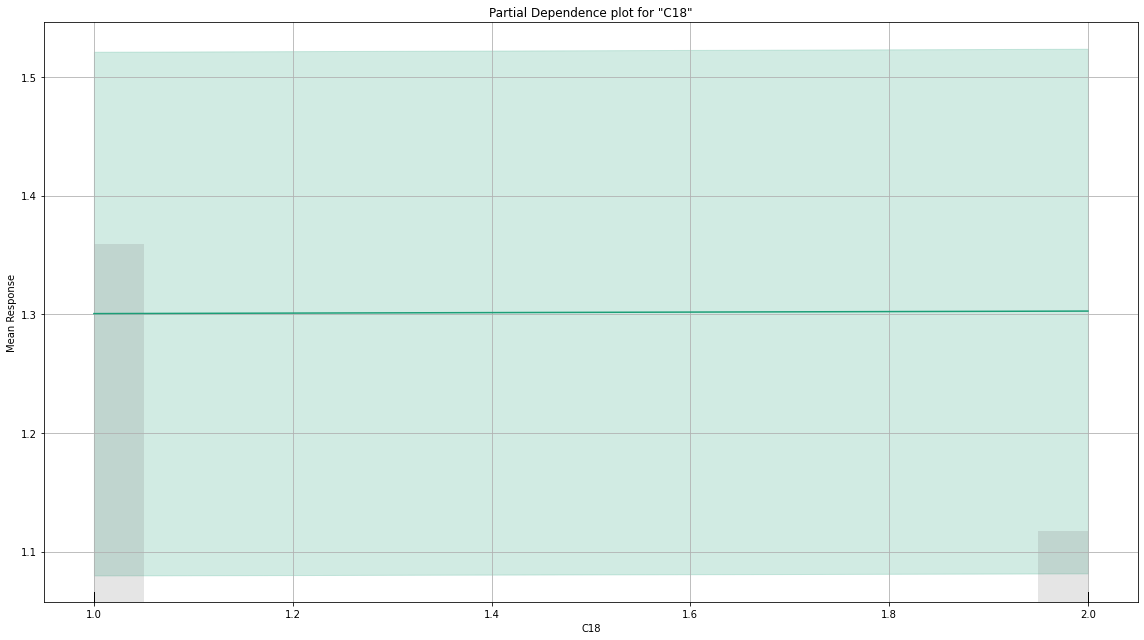

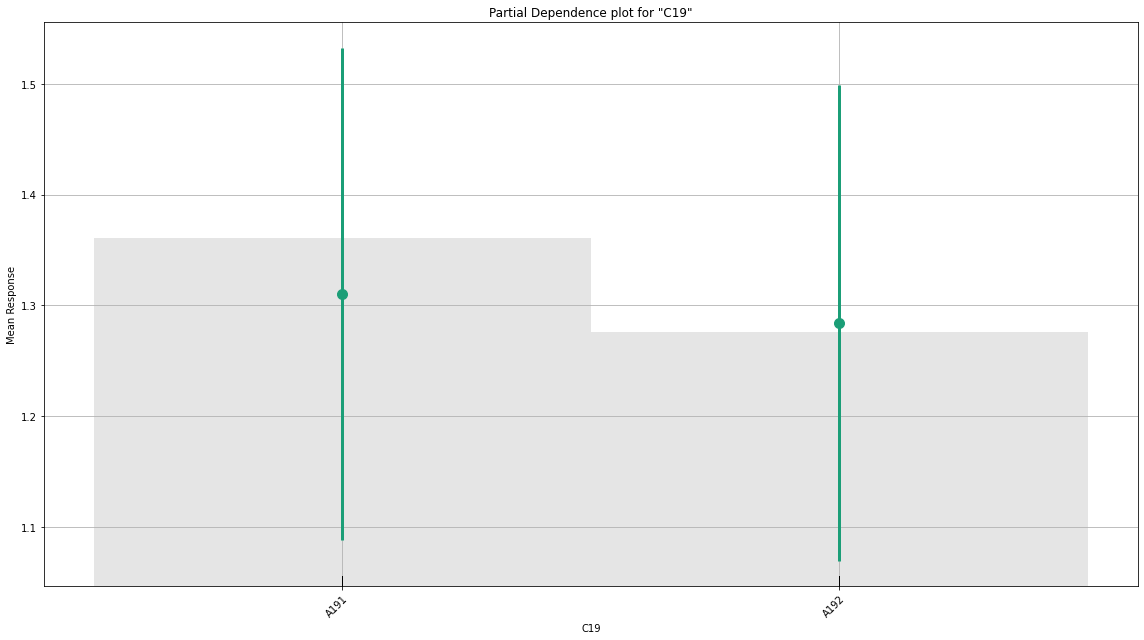

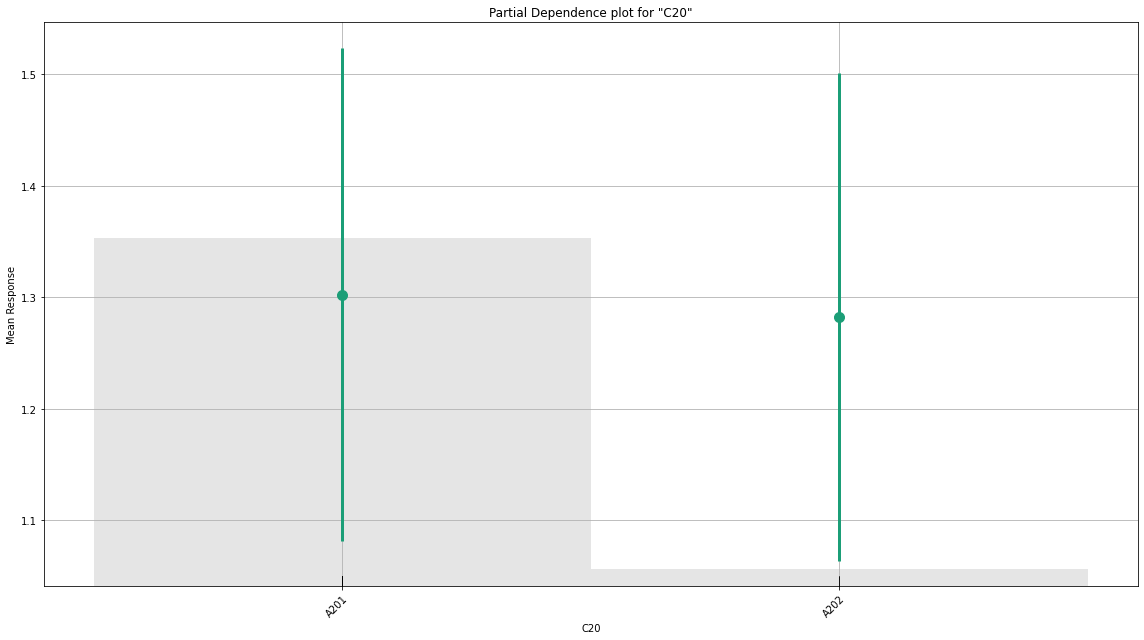

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

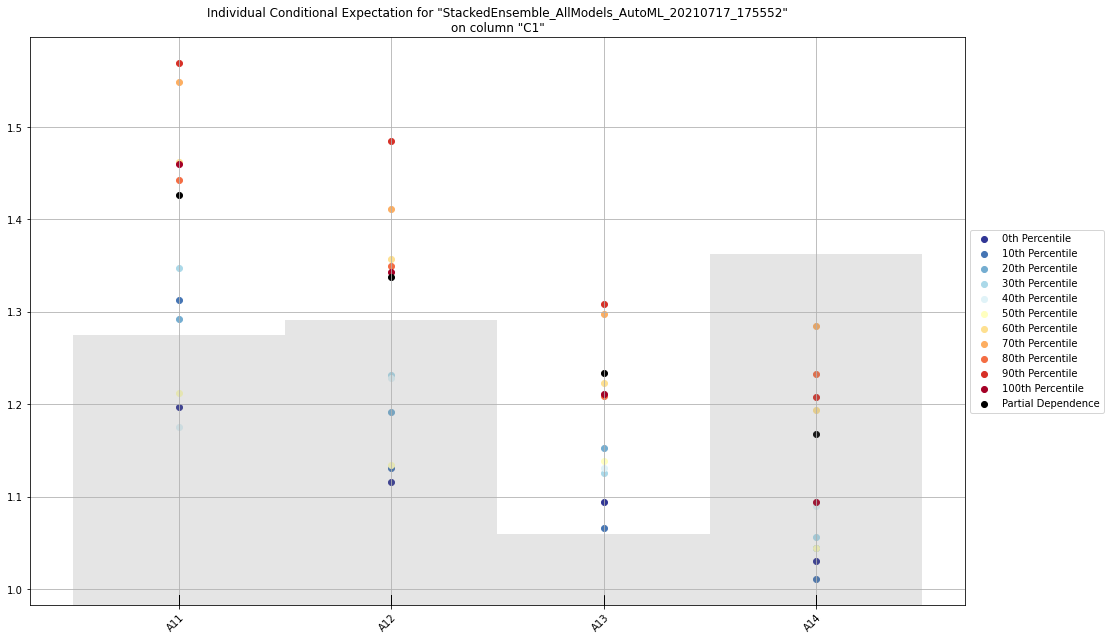

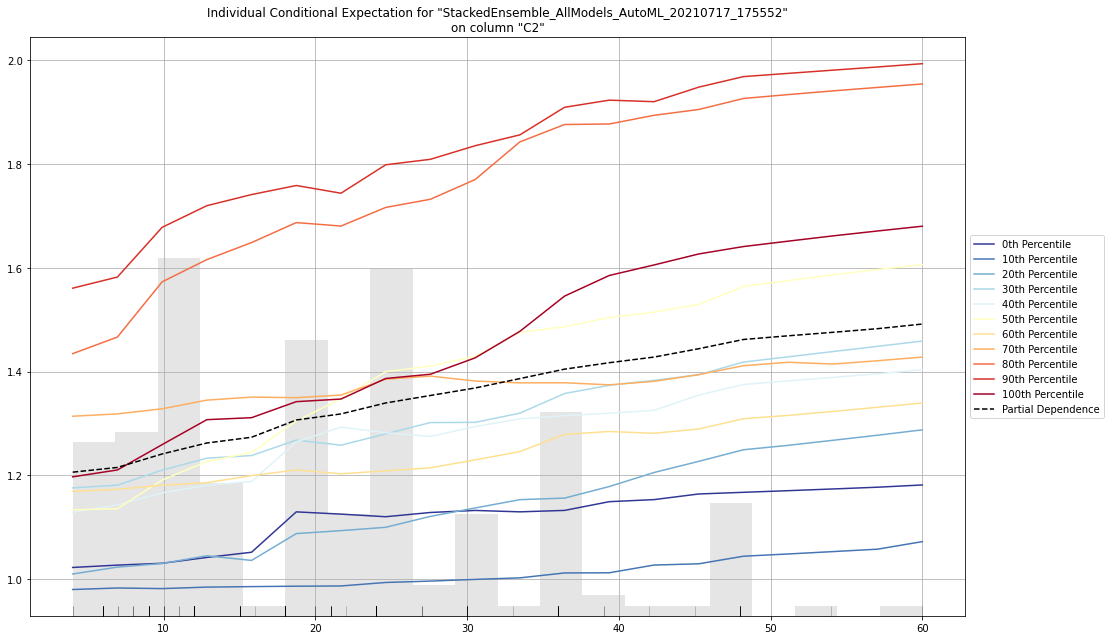

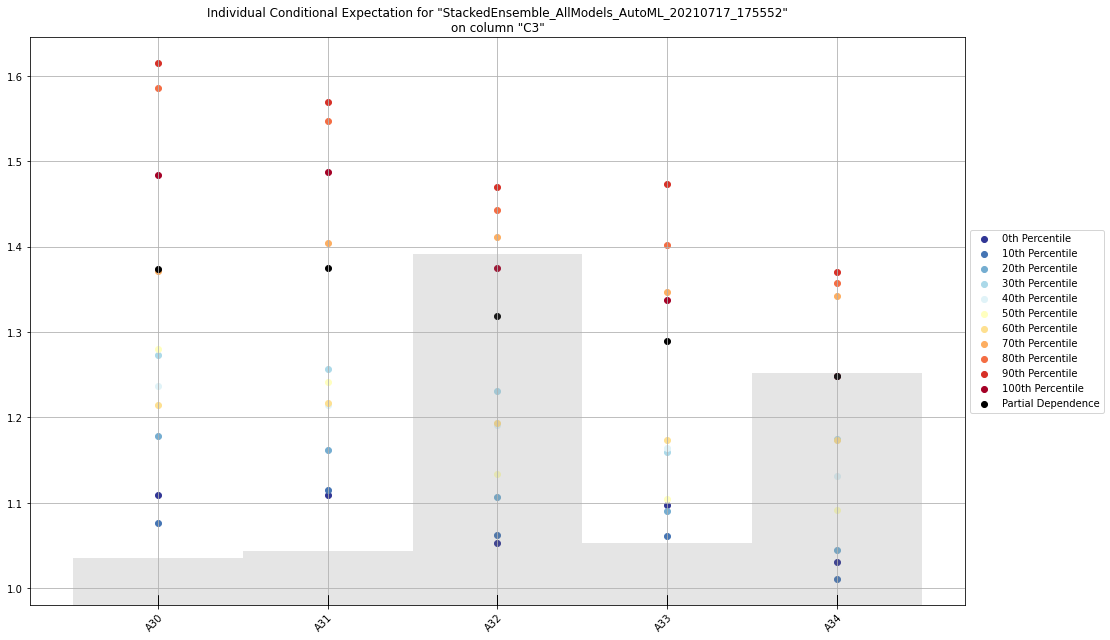

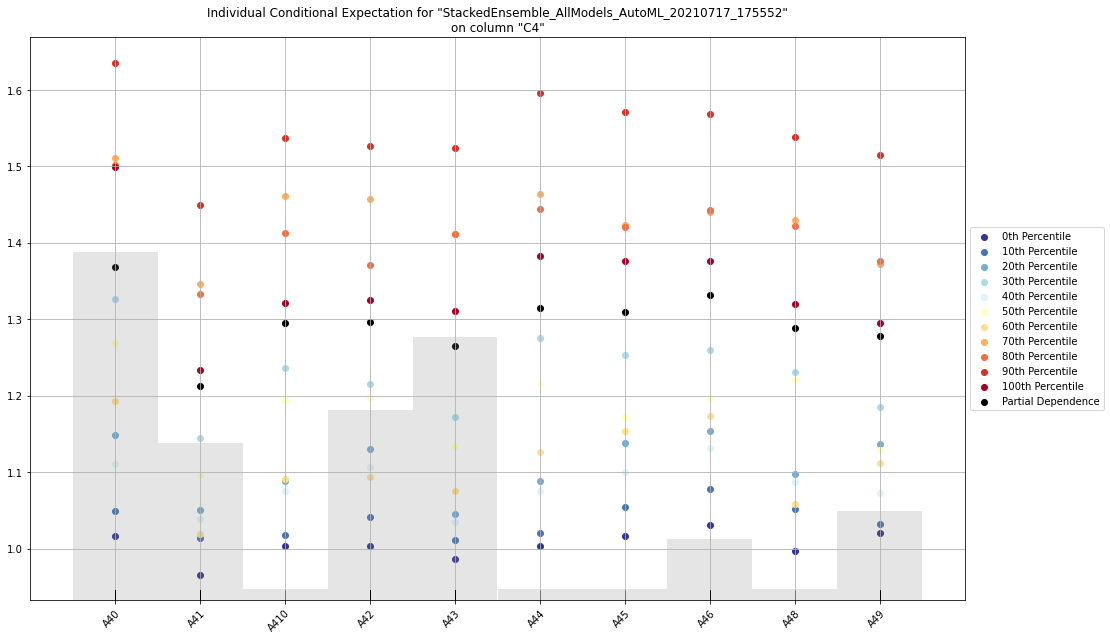

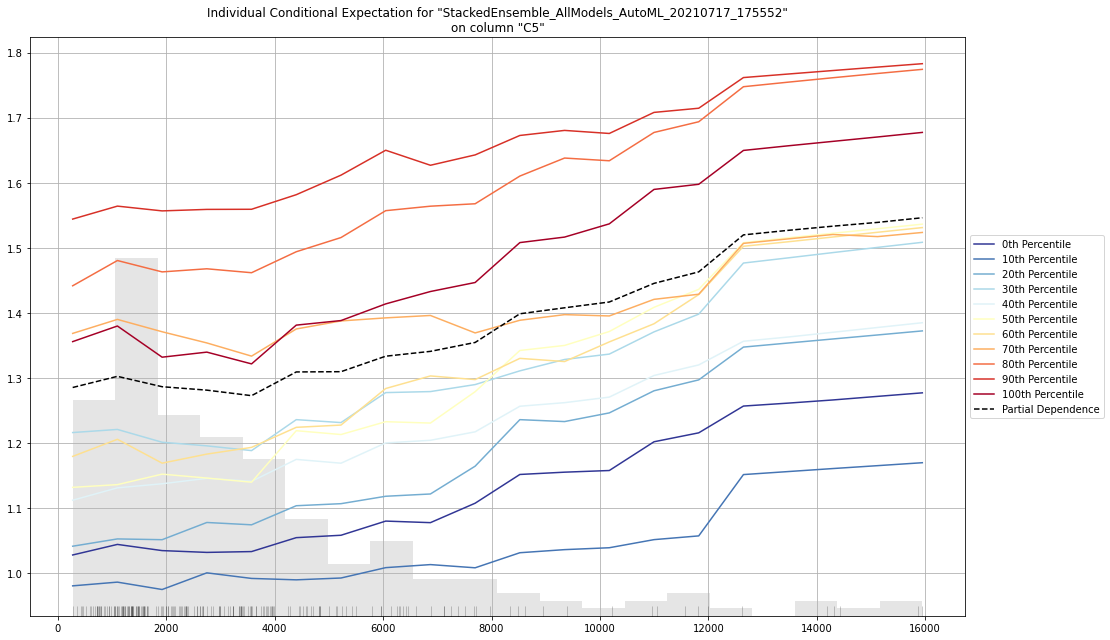

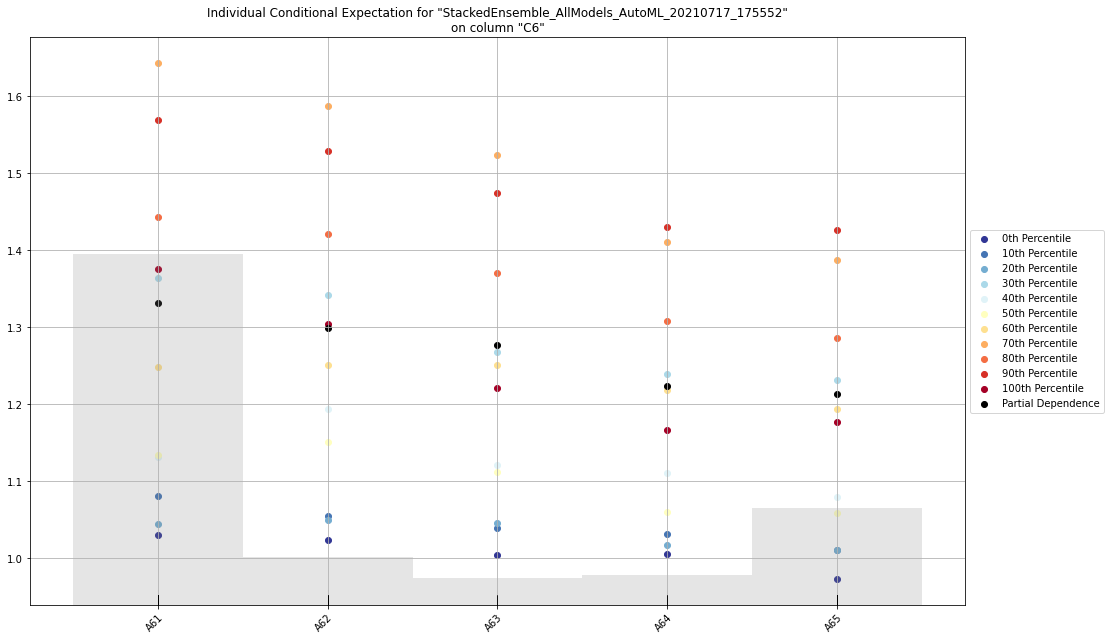

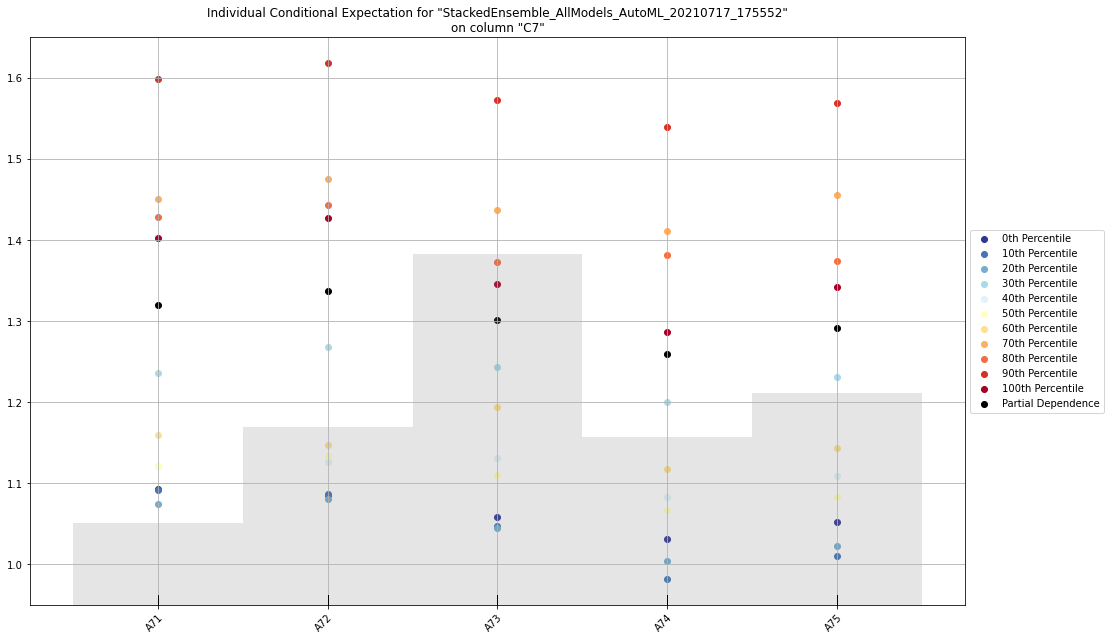

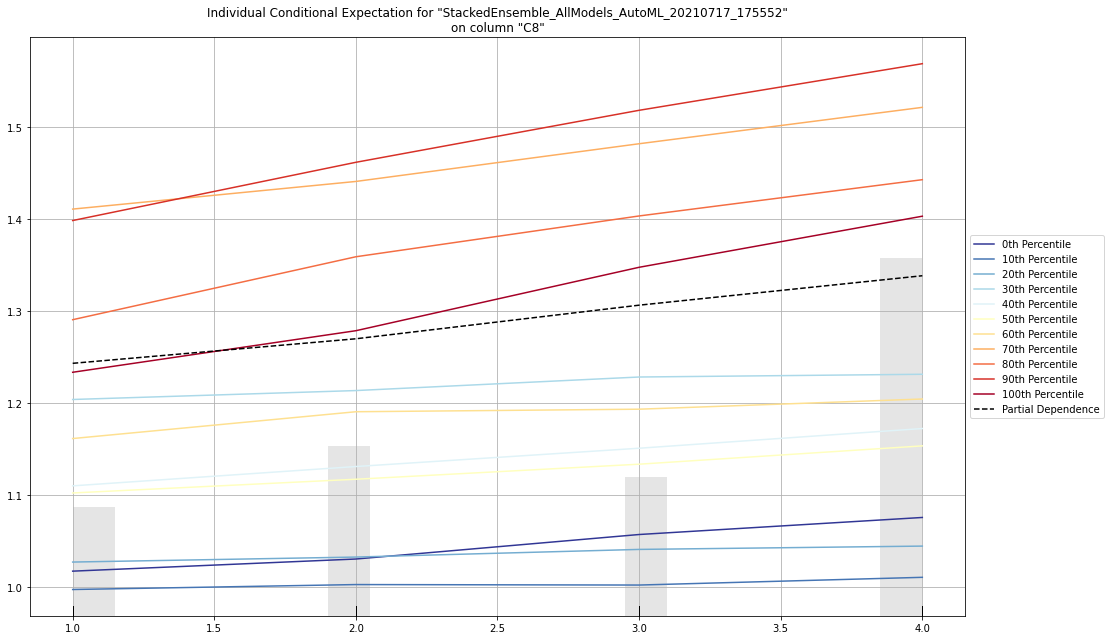

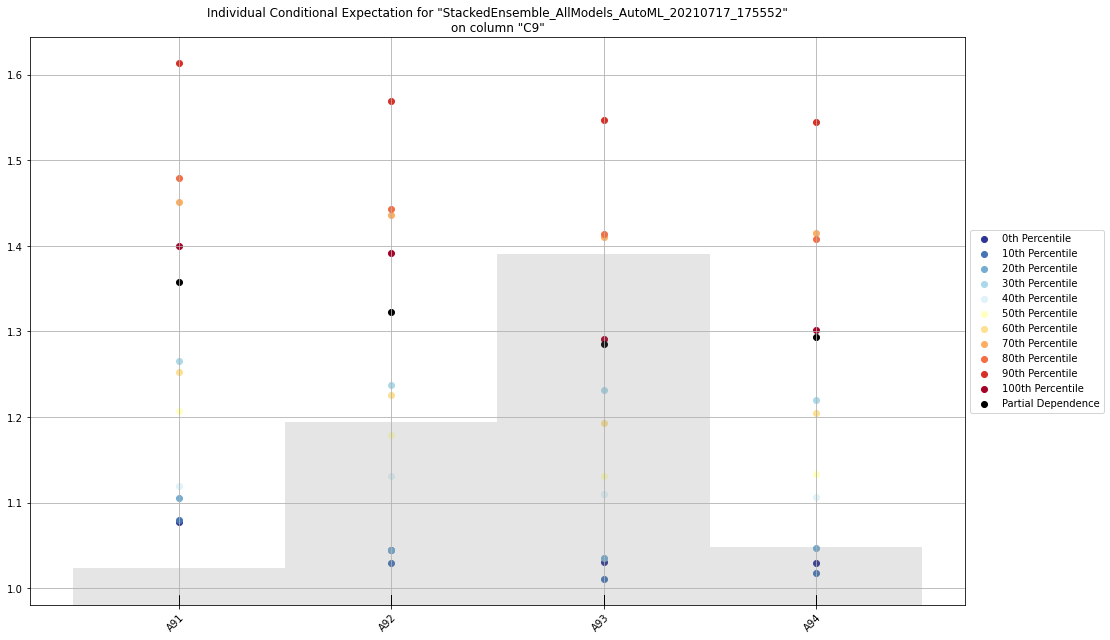

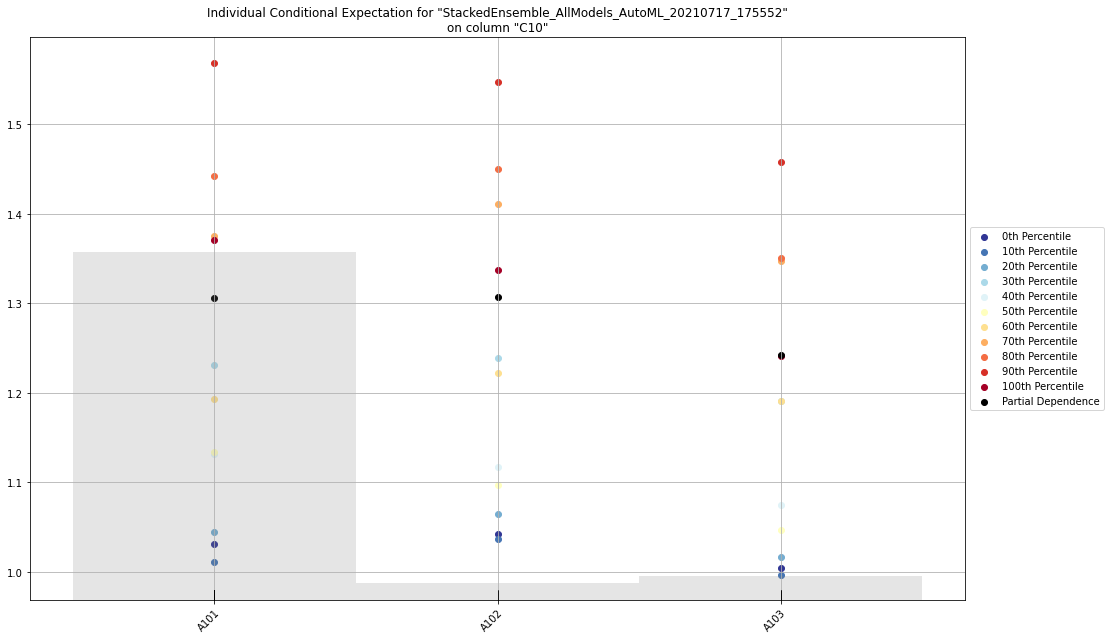

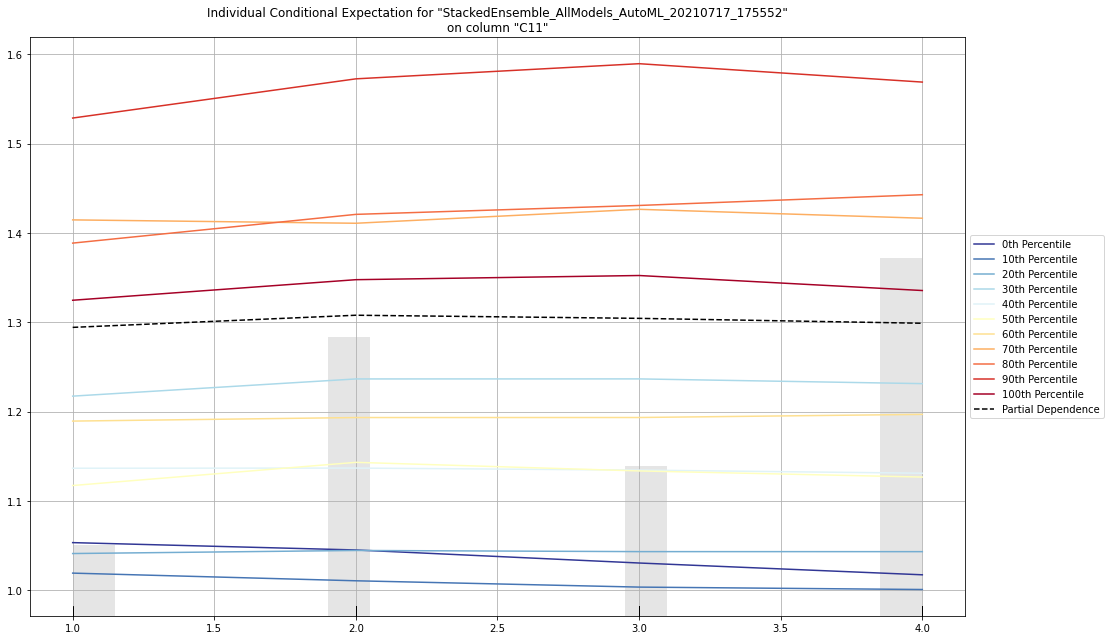

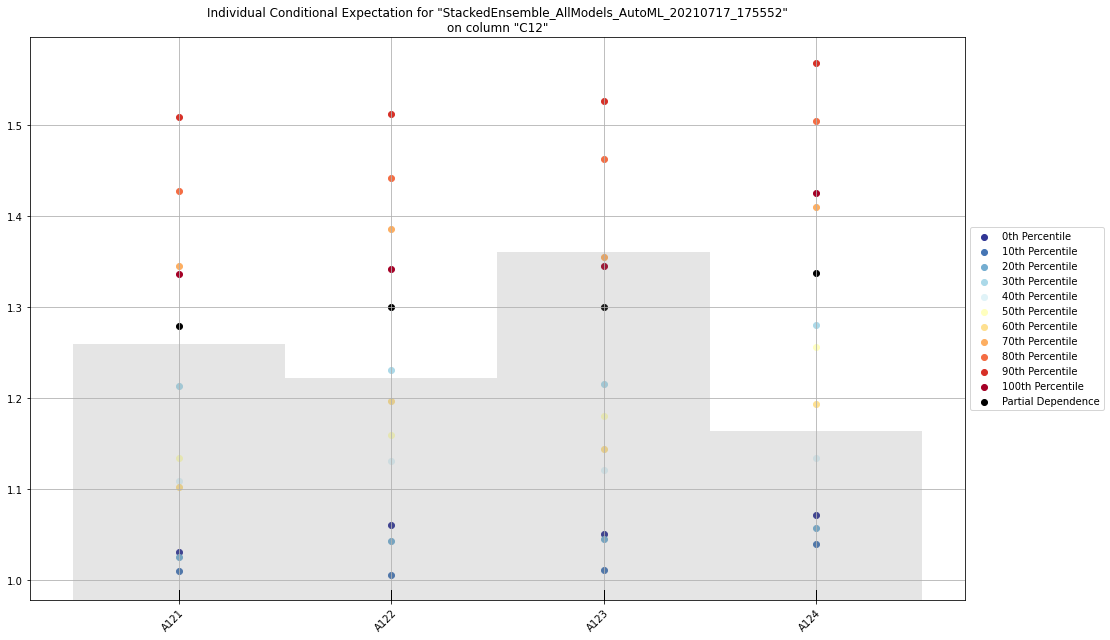

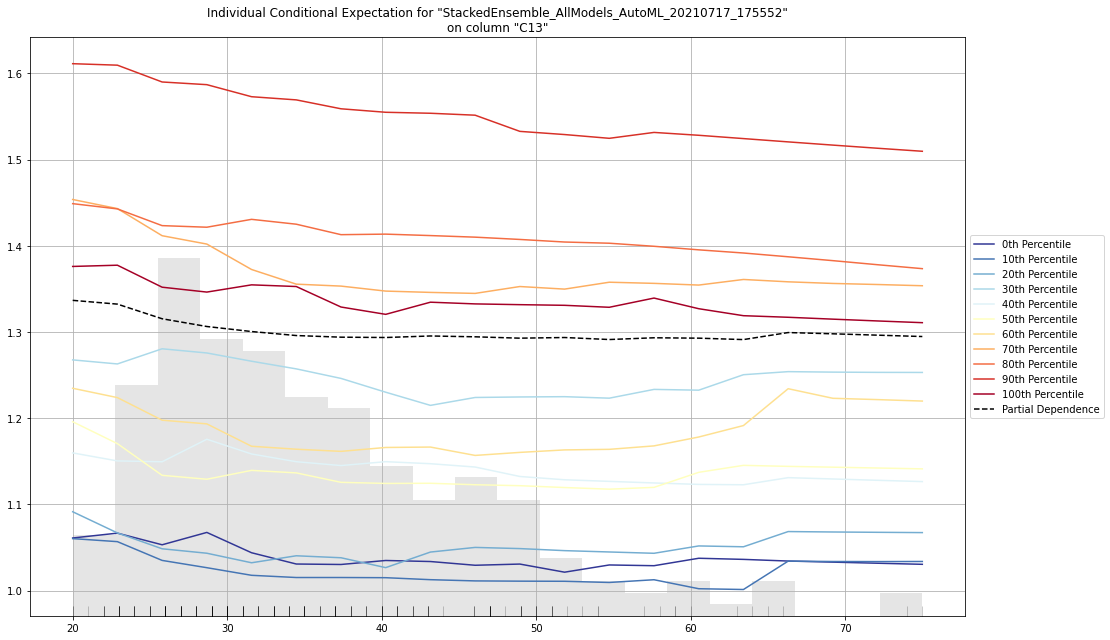

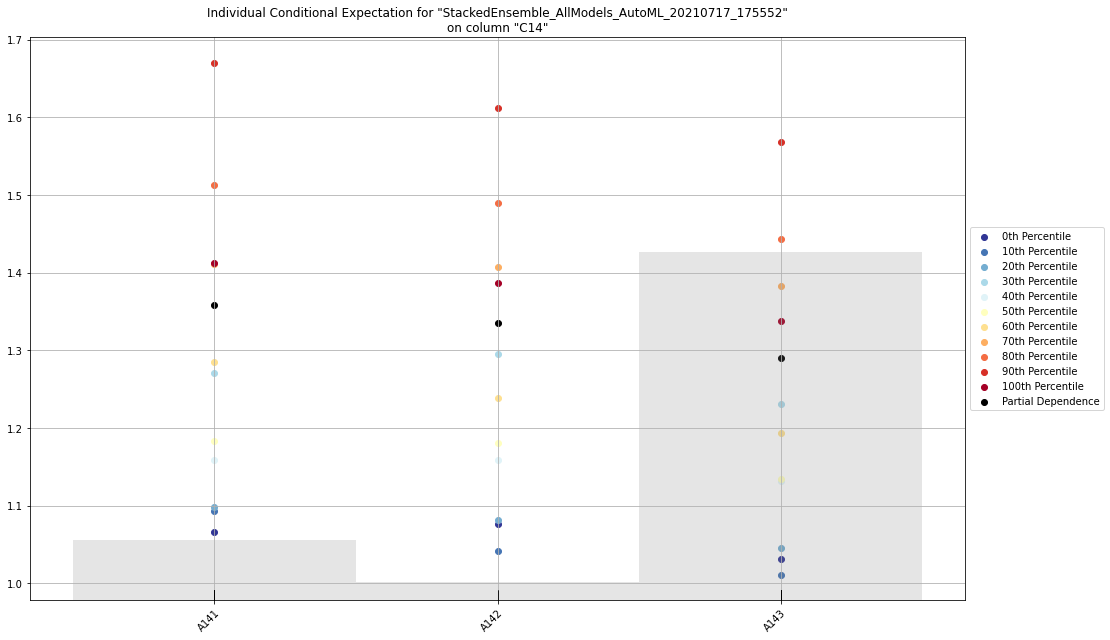

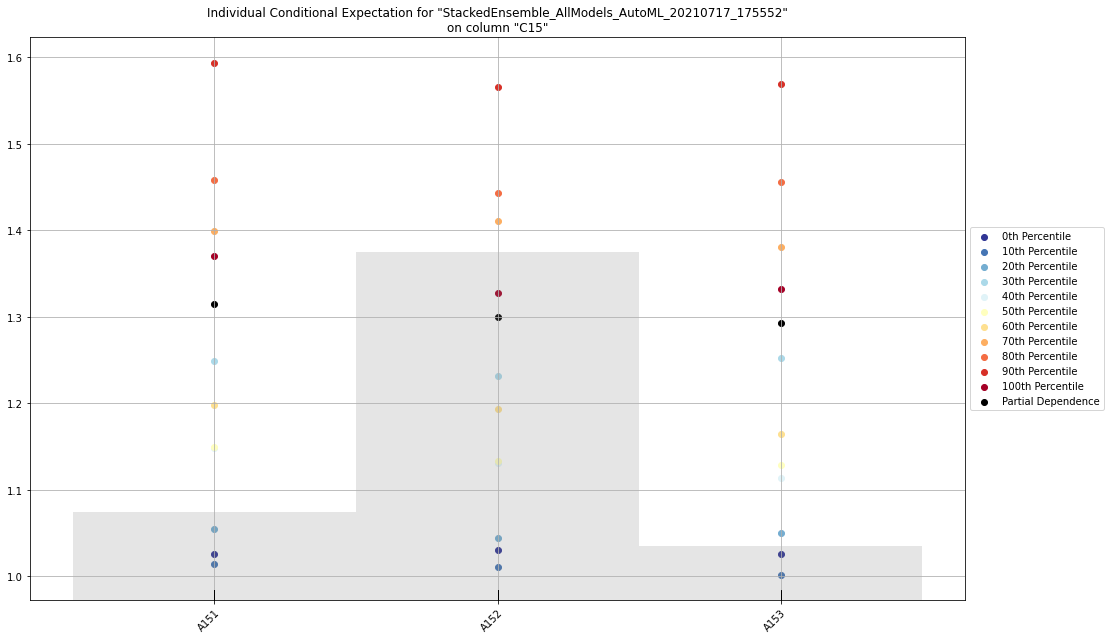

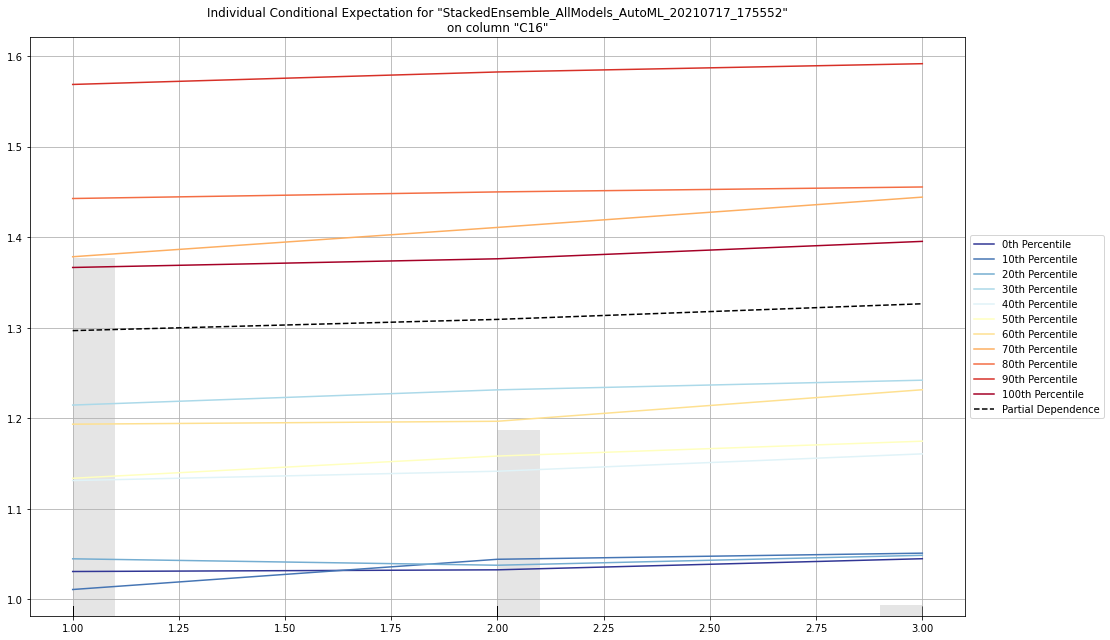

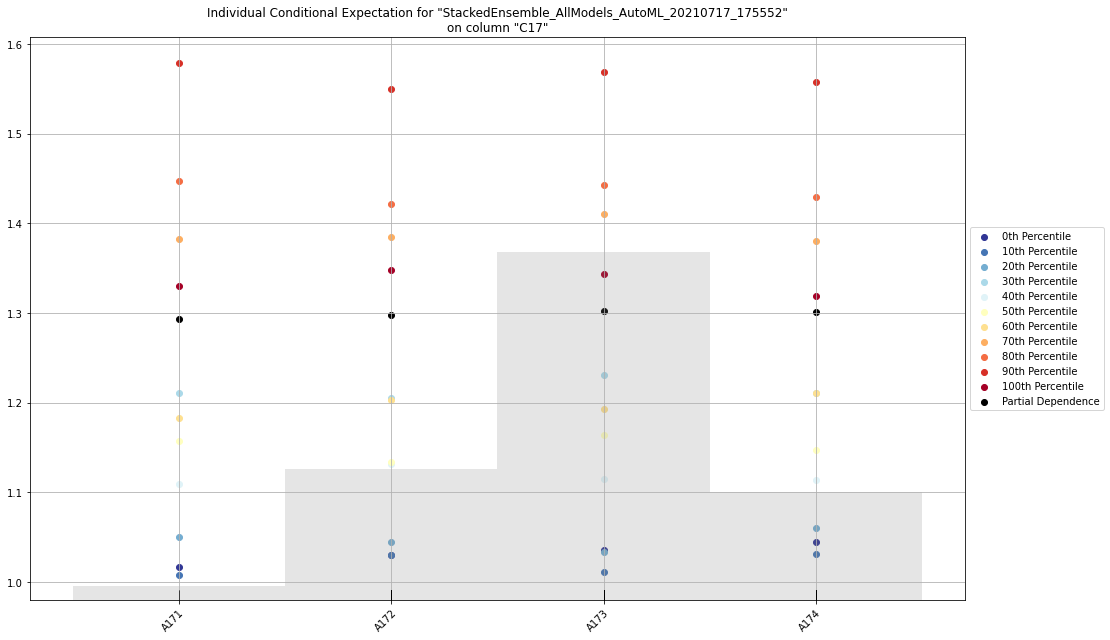

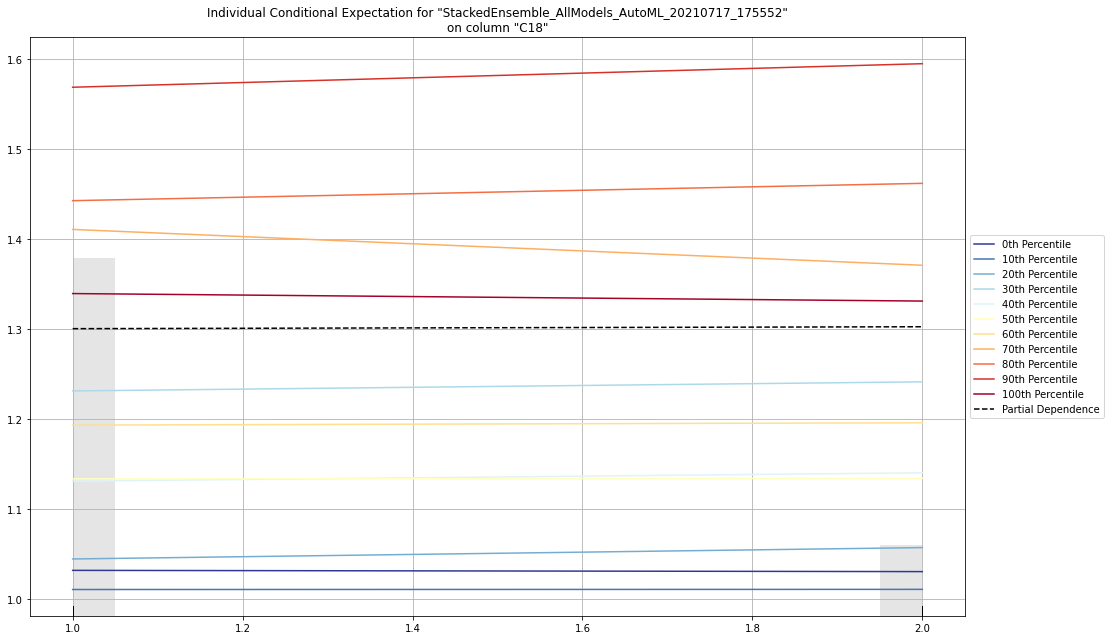

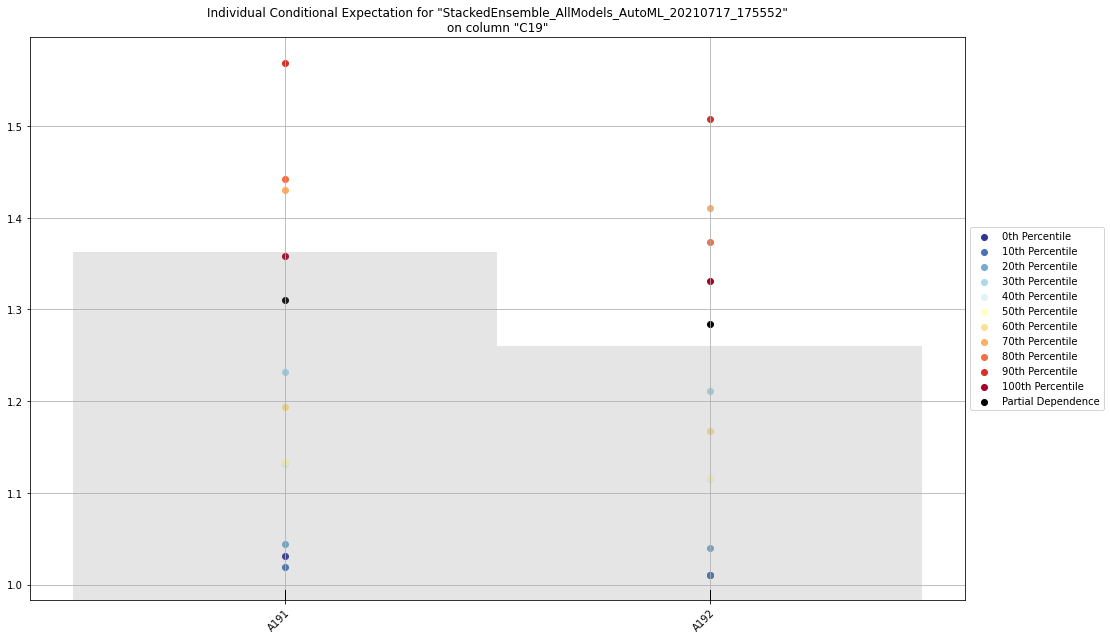

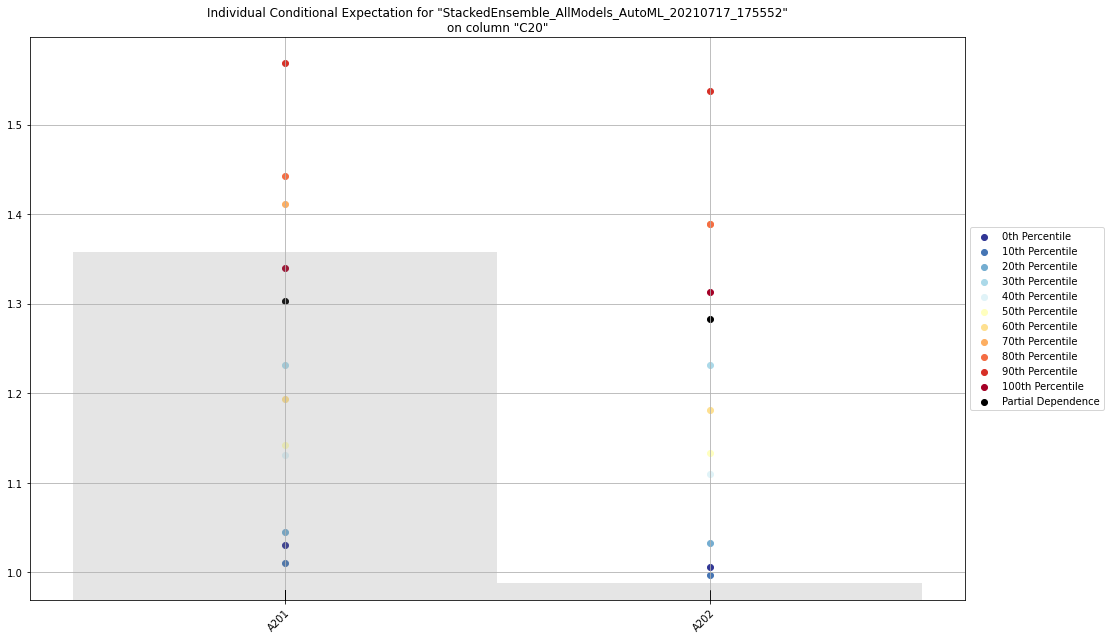

NameError: name 'model_list' is not defined

In [43]:
# Reponse column
y = "C21"

# Split into train & test
splits = df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

# Run AutoML for 1 minute
aml = H2OAutoML(max_runtime_secs=60, seed=1)
aml.train(y=y, training_frame=train)

# Explain leader model & compare with all AutoML models
exa = aml.explain(test)

# Explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(test)

# Explain a generic list of models
# use h2o.explain as follows:
#exl = h2o.explain(model_list, test)

In [46]:
leaderboard = aml.leaderboard

leaderboard.head(5)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20210717_175552,0.161739,0.402168,0.161739,0.31932,0.164005
StackedEnsemble_BestOfFamily_AutoML_20210717_175552,0.163166,0.403938,0.163166,0.325395,0.164631
XRT_1_AutoML_20210717_175552,0.164508,0.405596,0.164508,0.323894,0.164272
GBM_grid__1_AutoML_20210717_175552_model_1,0.165208,0.406457,0.165208,0.331835,0.165973
GBM_grid__1_AutoML_20210717_175552_model_7,0.165499,0.406815,0.165499,0.330797,0.166262


In [47]:
#As per AutoML Algorithem best model
aml.leader.model_performance(test)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.1666420607665759
RMSE: 0.4082181534015555
MAE: 0.3291798309223844
RMSLE: 0.16319856245120568
R^2: 0.28424873576007914
Mean Residual Deviance: 0.1666420607665759
Null degrees of freedom: 205
Residual degrees of freedom: 191
Null deviance: 49.51379680094411
Residual deviance: 34.32826451791463
AIC: 247.46980988160283
